## Вітаю вас на Mid-term проєкті!

Цей проєкт призначений для того, щоб ви могли оновити та закріпити знання, які ви отримали за перші місяці навчання на курсі "Machine Learning для людей".

### Основна задача

В цьому завданні Ви - Data Scientist в банку. Ваша задача - побудувати модель для передбачення, чи оформить клієнт в банку строковий депозит (term deposit). З подібними задачами ми стикаємось в різних компаніях і доменах, коли хочемо зрозуміти, чи клієнт купить якийсь продукт, чи буде користуватись нашим сервісом/сайтом у наступному місяці, чи придбає підписку.

Вам треба не просто побудувати модель, а і пояснити замовнику (ваш замовник тут - це ми з кураторами) як працює ця модель і чому вона дає саме такі рішення. Без цього розуміння ми не можемо перейти до впроваждення (деплойменту) моделі в продакшен.

### Практичне застовування

В реальних робочих умовах в подібних задачах у Вас дані будуть зберігатись в базі данних в динаміці (різні дії користувачів з датою і часом). Тут дані вже загреговані по клієнтам і часто саме з цього ви будете починати побудову моделі передбачення, адже це відносно просто і зручно: загрегувати дані по клієнтам до певного часу і передбачати в майбутнє (тільки в випадку тренування моделі ML наше "майбутнє" теж фактично в минулому - бо ми хочемо мати мітки в даних, а от вже при використанні моделі в продакшені і бойових умовах ви справді будете робити передбачення в майбутнє). Тож, розвʼязуємо задачку!

### Датасет і ML задача

Для виконання завдання ми використаємо набір даних, який оригінально походить з сайту [UCI Machine Learning Repository], але там неточний опис даних і багато різних піднаборів, тому ми братимемо з Kaggle dataset: https://www.kaggle.com/datasets/sahistapatel96/bankadditionalfullcsv.

Ці дані стосуються прямих маркетингових кампаній (телефонних дзвінків) португальської банківської установи. Кінцева мета класифікації - передбачити, чи підпише клієнт строковий депозит (змінна y).

Ми будемо працювати з файлом `bank-additional-full.csv`, скачати набір даних треба з Kaggle. Або можна скачати цей самий набір з гугл диска [тут](https://drive.google.com/file/d/1pDr0hAOnu1JsEiJeBu_F2Jv0GPxKiujW/view?usp=drive_link)

### Опис змінних

Цей опис є і на Kaggle, але ми переклали для вашої зручності і аби він був у вас перед очима під час роботи над проєктом.

#### **Дані про клієнта банку**:
1. **age** – вік клієнта (числова змінна).  
2. **job** – вид зайнятості (категоріальна змінна: `admin.`, `blue-collar`, `entrepreneur`, `housemaid`, `management`, `retired`, `self-employed`, `services`, `student`, `technician`, `unemployed`, `unknown`).  
3. **marital** – сімейний стан (категоріальна змінна: `divorced`, `married`, `single`, `unknown`; примітка: `divorced` означає розлучений або вдівець/вдова).  
4. **education** – рівень освіти (категоріальна змінна: `basic.4y`, `basic.6y`, `basic.9y`, `high.school`, `illiterate`, `professional.course`, `university.degree`, `unknown`).  
5. **default** – чи є у клієнта прострочений кредит? (категоріальна змінна: `no`, `yes`, `unknown`).  
6. **housing** – чи має клієнт іпотечний кредит? (категоріальна змінна: `no`, `yes`, `unknown`).  
7. **loan** – чи має клієнт споживчий кредит? (категоріальна змінна: `no`, `yes`, `unknown`).  

#### **Дані про останній контакт у межах поточної маркетингової кампанії**:
8. **contact** – тип зв’язку при останньому контакті (категоріальна змінна: `cellular`, `telephone`).  
9. **month** – місяць останнього контакту (категоріальна змінна: `jan`, `feb`, `mar`, …, `nov`, `dec`).  
10. **day_of_week** – день тижня останнього контакту (категоріальна змінна: `mon`, `tue`, `wed`, `thu`, `fri`).  
11. **duration** – тривалість останнього контакту в секундах (числова змінна).  
   ⚠ **Важлива примітка**: ця змінна має суттєвий вплив на цільову змінну (наприклад, якщо duration = 0, то y = `no`). Однак значення duration невідоме до здійснення дзвінка. Крім того, після завершення дзвінка значення y вже відоме. Тому цю змінну варто використовувати лише для порівняння моделей, але не включати у фінальну передбачувальну модель.  

#### **Інші атрибути**:
12. **campaign** – кількість контактів у межах поточної кампанії для цього клієнта (числова змінна, включає останній контакт).  
13. **pdays** – кількість днів, що минули з моменту останнього контакту клієнта у попередній кампанії (числова змінна; значення 999 означає, що клієнт раніше не контактувався).  
14. **previous** – кількість контактів, здійснених до цієї кампанії для цього клієнта (числова змінна).  
15. **poutcome** – результат попередньої маркетингової кампанії (категоріальна змінна: `failure`, `nonexistent`, `success`).  

#### **Атрибути соціально-економічного контексту**:
16. **emp.var.rate** – темп зміни зайнятості (щоквартальний показник, числова змінна).  
17. **cons.price.idx** – індекс споживчих цін (щомісячний показник, числова змінна).  
18. **cons.conf.idx** – індекс довіри споживачів (щомісячний показник, числова змінна).  
19. **euribor3m** – ставка Euribor на 3 місяці (щоденний показник, числова змінна).  
20. **nr.employed** – кількість працевлаштованих осіб (щоквартальний показник, числова змінна).  

#### **Цільова змінна**:
21. **y** – чи підписав клієнт строковий депозит? (бінарна змінна: `yes`, `no`).

### Ваше завдання на цей проєкт

Необхідно побудувати рішення цієї задачі бінарної класифікації. Для цього

1. Провести Exploratory Data Analysis і висунути гіпотези щодо впливу окремих ознак на цільову ознаку `y`.

2. Описати, які методи ви вважаєте доречним використовувати і обрати метрику оцінки якості моделей (метрику треба обґрунтувати).

3. Провести препроцесинг даних для подальшої їх передачі в модель. Препроцесинг має включати
  - обробку категоріальних змінних (якщо цього потребує модель)
  - групування категорій в категоріальних змінних, якщо потрібно
  - заповнення пропущених значень, якщо такі є
  - виявлення outliers і прийняття рішень, що з ними робити
  - створення додаткових ознак, які на ваш погляд поліпшать якість моделей ML.

4. Натренувати 4 різні типи моделей машинного навчання, з яких обовʼязково
  - Logistic Regression
  - kNN
  - Decision Tree
  - Принаймні один з алгоритмів бустингу

5. Створити таблицю з порівнянням якості моделей (в Google Spreadsheets або прямо в Jupyter Notebook), де зазначити
  - назву моделі
  - гіперпараметри
  - метрика якості моделі на тренувальному наборі
  - метрика якості моделі на валідаційному наборі даних
  - коментар до моделі - хороша вона, чи ні, чи варто її використовувати чи ні, чи є у вас подальші ідеї щодо експериментів з цією моделлю?

6. Для алгоритму бустингу виконати процедуру тюнингу гіперпараметрів двома способами
  - Sklearn: Randomized Search
  - Hyperopt: Bayesian Optimization.
  Виявити оптимальні гіперпараметри і зробити висновки про якість моделі в кожному з випадків.

7. Вивести важливість ознак для моделі, які показала себе найкраще і описати, чи вважаєте ви саме такий пріоритет важливості ознак адекватним з точки зору common sense?

8. Для найкращої провести аналіз впливу ознак на передбачення з допомогою бібліотеки SHAP.

9. Провести аналіз записів, в яких модель помиляється і на основі нього зазначити, яким чином можна поліпшити наявне рішення аби уникати наявних помилок?


### Результат виконання проєкту

Результатом виконання цього завдання є окремий github репозиторій з охайно оформленим Jupyter Notebook, частина коду може бути винесена в .py файли. Репозиторій має містити опис задачі, опис що було зроблено і які моделі використано, таблицю результатів експериментів (можна скріншотом або створити таблицю в Markdown форматі - див. Приклад) і висновки, що Ви досягли і що можна було б ще зробити для поліпшення результатів.


### Приклад проєкту

Для натхнення ви можете ознайомитись з проєктом, побудованим на основі цих даних за [цим посиланням](https://github.com/surtantheta/Bank_Marketing_Dataset_Machine_Learning_Project).




![](https://blogconcept2competence.wordpress.com/wp-content/uploads/2014/03/yoda.jpg)

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import OrdinalEncoder
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_auc_score, accuracy_score, precision_score, recall_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
import xgboost as xgb
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import uniform, randint
from hyperopt import fmin, tpe, hp, Trials, STATUS_OK
from functools import partial
import shap
from sklearn.metrics import confusion_matrix

In [4]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [5]:
df = pd.read_csv("drive/MyDrive/Colab Notebooks/bank-additional-full.csv", sep=';')

In [6]:
df.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


In [7]:
df.info(verbose = True, show_counts = True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             41188 non-null  int64  
 1   job             41188 non-null  object 
 2   marital         41188 non-null  object 
 3   education       41188 non-null  object 
 4   default         41188 non-null  object 
 5   housing         41188 non-null  object 
 6   loan            41188 non-null  object 
 7   contact         41188 non-null  object 
 8   month           41188 non-null  object 
 9   day_of_week     41188 non-null  object 
 10  duration        41188 non-null  int64  
 11  campaign        41188 non-null  int64  
 12  pdays           41188 non-null  int64  
 13  previous        41188 non-null  int64  
 14  poutcome        41188 non-null  object 
 15  emp.var.rate    41188 non-null  float64
 16  cons.price.idx  41188 non-null  float64
 17  cons.conf.idx   41188 non-null 

# Функціі

In [8]:
def dist_box(dataset, column):
    with warnings.catch_warnings():
      warnings.simplefilter("ignore")

      plt.figure(figsize=(16,6))

      plt.subplot(1,2,1)
      sns.distplot(dataset[column], color = 'purple')
      pltname = 'Графік розподілу для ' + column
      plt.ticklabel_format(style='plain', axis='x')
      plt.title(pltname)

      plt.subplot(1,2,2)
      red_diamond = dict(markerfacecolor='r', marker='D')
      sns.boxplot(y = column, data = dataset, flierprops = red_diamond)
      pltname = 'Боксплот для ' + column
      plt.title(pltname)

      plt.show()

In [9]:
def success_proportion(dataset, column):
  success_rate = dataset.groupby(column)['y'].value_counts(normalize=True).unstack().fillna(0)
  success_rate = success_rate.sort_values(by='yes', ascending=False)
  success_rate['yes'].plot(kind='bar', figsize=(10, 6))

  title = 'Відсоток підписання депозиту за ' + column
  plt.title(title)
  plt.xlabel(column)
  plt.ylabel('Відсоток успіху')
  plt.xticks(rotation=45, ha='right')
  plt.grid(axis='y', linestyle='--', alpha=0.7)
  plt.show()

In [10]:
def general_prportion(dataset, column):
  dataset['y_numeric'] = dataset['y'].apply(lambda x: 1 if x == 'yes' else 0)

  column_grouped = dataset.groupby(column)['y_numeric'].sum().reset_index()
  column_grouped.columns = [column, 'yes_count']

  column_total = dataset[column].value_counts().reset_index()
  column_total.columns = [column, 'total_count']

  merged_df = pd.merge(column_total, column_grouped, on=column)
  merged_df['no_count'] = merged_df['total_count'] - merged_df['yes_count']
  merged_df = merged_df.sort_values(by='yes_count', ascending=False)

  merged_df.plot(x=column, y=['yes_count', 'no_count'], kind='bar', stacked=True, figsize=(10, 6))
  title = 'Кількість клієнтів, які підписали/не підписали депозит, за ' + column
  plt.title(title)
  plt.xlabel(column)
  plt.ylabel('Кількість клієнтів')
  plt.xticks(rotation=45, ha='right')
  plt.show()

In [11]:
def entityProportion(df, category):
  category_type_counts = df[category].value_counts()

  most_common_category_type = category_type_counts.index[0]
  most_common_category_type_count = category_type_counts.iloc[0]

  print(f"\nНайпоширеніший тип в категорії {category}: {most_common_category_type} ({most_common_category_type_count})")

# Exploratory Data Analysis

## Аналіз розподілу цільової змінної

y
no     36548
yes     4640
Name: count, dtype: int64


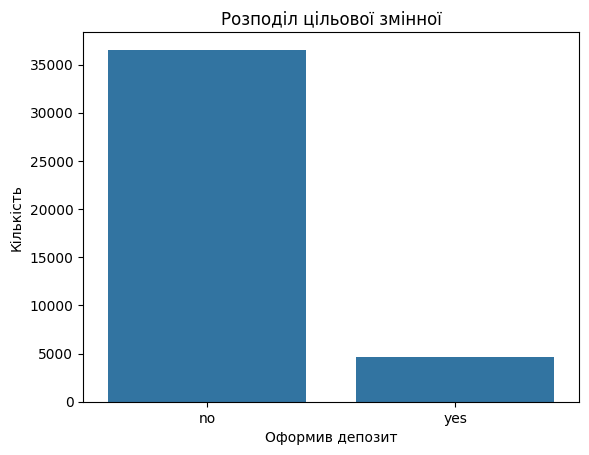

In [12]:
y_counts = df['y'].value_counts()
print(y_counts)

sns.countplot(x='y', data=df)
plt.title('Розподіл цільової змінної')
plt.ylabel('Кількість')
plt.xlabel('Оформив депозит')
plt.show()

**Спостереження**

Бачимо, що дані сильно дисбалансовані: кількість клієнтів, які не оформили депозит (no), значно перевищує кількість тих, хто його оформив (yes). Це означає, що точність (accuracy) не буде хорошою метрикою для оцінки моделі. Нам потрібно буде використовувати такі метрики, як F1-score, Precision, Recall або AUC-ROC.



## Аналіз числових змінних

In [13]:
number_df = df.select_dtypes(include="number")

print(number_df.columns)

Index(['age', 'duration', 'campaign', 'pdays', 'previous', 'emp.var.rate',
       'cons.price.idx', 'cons.conf.idx', 'euribor3m', 'nr.employed'],
      dtype='object')


### Age

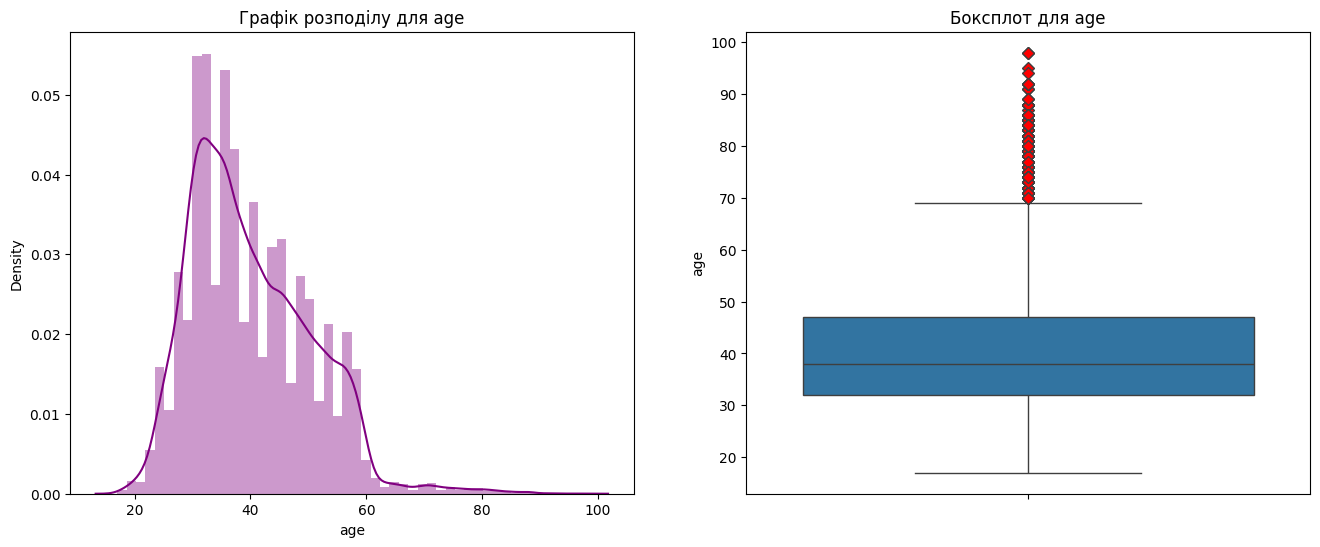

In [14]:
dist_box(df,'age')

**Спостереження**

- Гістограма показує, що більшість клієнтів мають вік від 30 до 40 років. Розподіл віку схожий на нормальний, але зі зсувом у бік молодшого віку.

- Медіанний вік для обох класів (no та yes) дуже схожий. Також в обох категоріях спостерігаються доволі багато викидів для більш старшого покоління.

## Аналіз категоріальних змінних

In [15]:
df.select_dtypes(include = "object").columns

Index(['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact',
       'month', 'day_of_week', 'poutcome', 'y'],
      dtype='object')

### Job

In [16]:
job_counts = df['job'].value_counts()
print(job_counts)

job
admin.           10422
blue-collar       9254
technician        6743
services          3969
management        2924
retired           1720
entrepreneur      1456
self-employed     1421
housemaid         1060
unemployed        1014
student            875
unknown            330
Name: count, dtype: int64


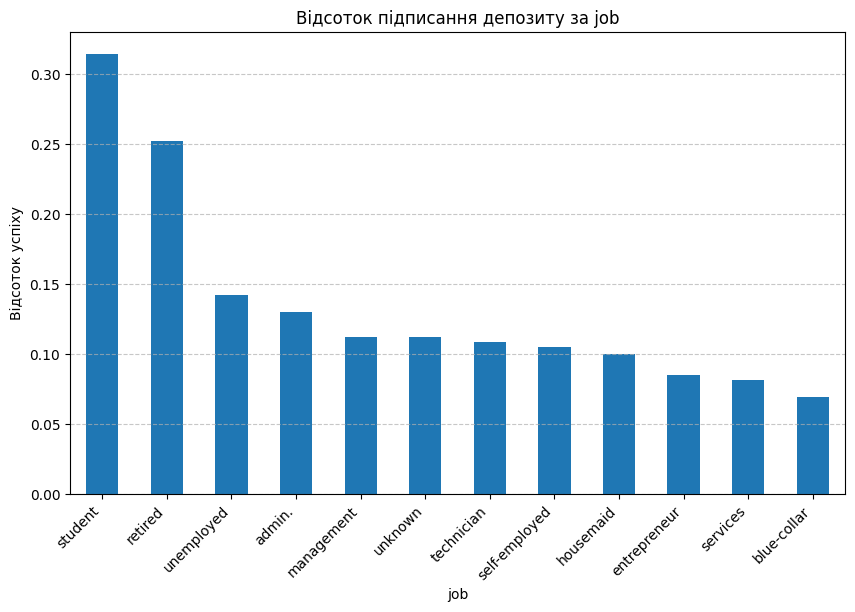

In [17]:
success_proportion(df, 'job')

### Кількість клієнтів, які підписали/не підписали депозит, за професією

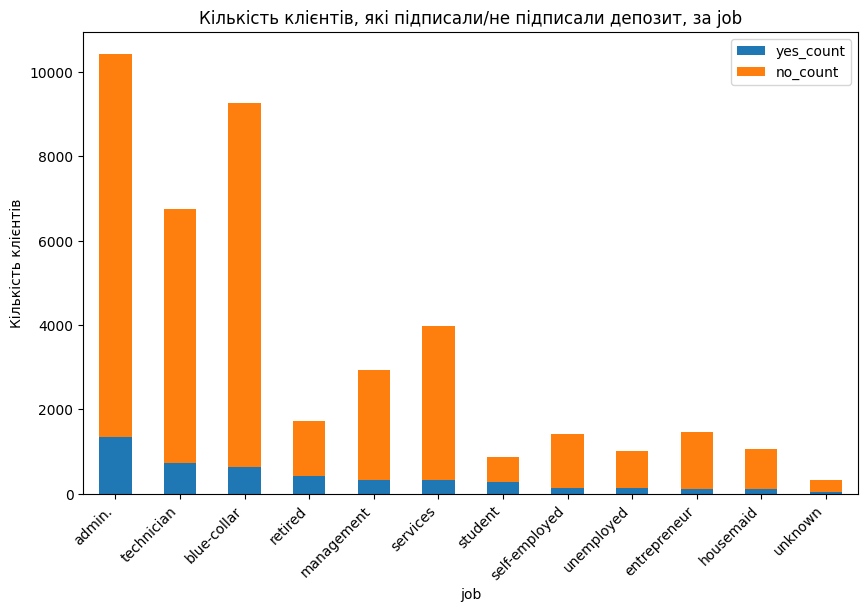

In [18]:
general_prportion(df, 'job')

**Спостереження**

- Найбільші групи клієнтів за професією — admin. та blue-collar

- Відсоток підписання депозиту значно варіюється. Студенти (student) та пенсіонери (retired) мають найвищий показник успіху (31.4% та 25.2% відповідно). На противагу, blue-collar мають найнижчий показник (6.8%).

- Але хоча student та retired мають найвищий відсоток успіху, найбільшу кількість успішних угод було укладено з клієнтами з професіями admin., technician та blue-collar.

### Marital

In [19]:
marital_counts = df['marital'].value_counts()
print(marital_counts)

marital
married     24928
single      11568
divorced     4612
unknown        80
Name: count, dtype: int64


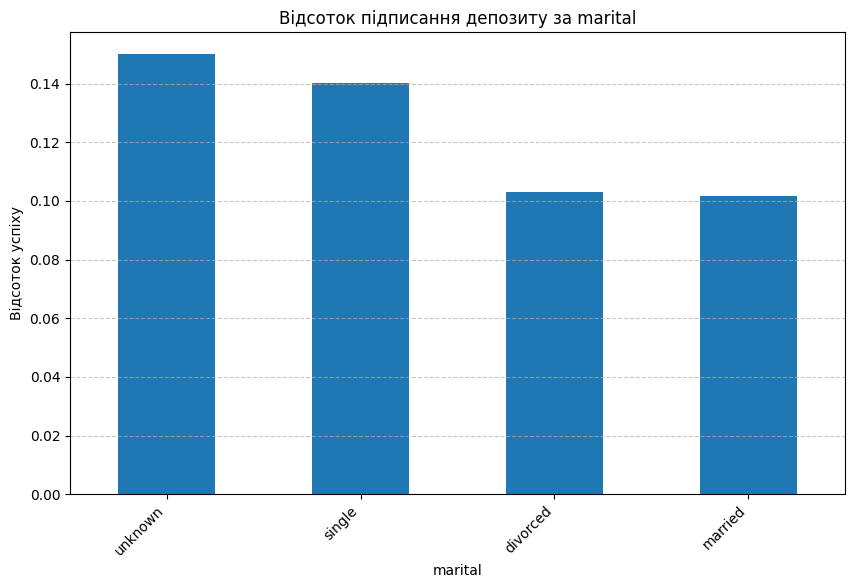

In [20]:
success_proportion(df, 'marital')

### Кількість клієнтів, які підписали/не підписали депозит, за сімейним станом

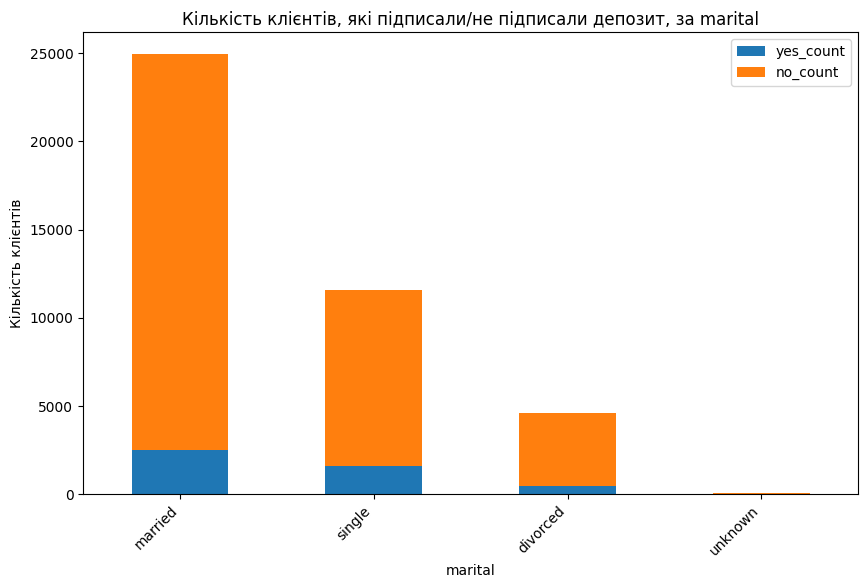

In [21]:
general_prportion(df, 'marital')

In [22]:
marital_y = df.groupby('marital')['y'].value_counts(normalize=True).unstack().fillna(0)*100
print(marital_y)

y                no        yes
marital                       
divorced  89.679098  10.320902
married   89.842747  10.157253
single    85.995851  14.004149
unknown   85.000000  15.000000


**Спостереження**

-  Більшість клієнтів одружені (married), наступні за кількістю — single та divorced.

- Клієнти, які single або мають невідомий сімейний стан, демонструють вищий відсоток підписання (14.0% та 15.0% відповідно) порівняно з married та divorced (10.1% та 10.3%).

### Education

In [23]:
education_counts = df['education'].value_counts()
print(education_counts)

education
university.degree      12168
high.school             9515
basic.9y                6045
professional.course     5243
basic.4y                4176
basic.6y                2292
unknown                 1731
illiterate                18
Name: count, dtype: int64


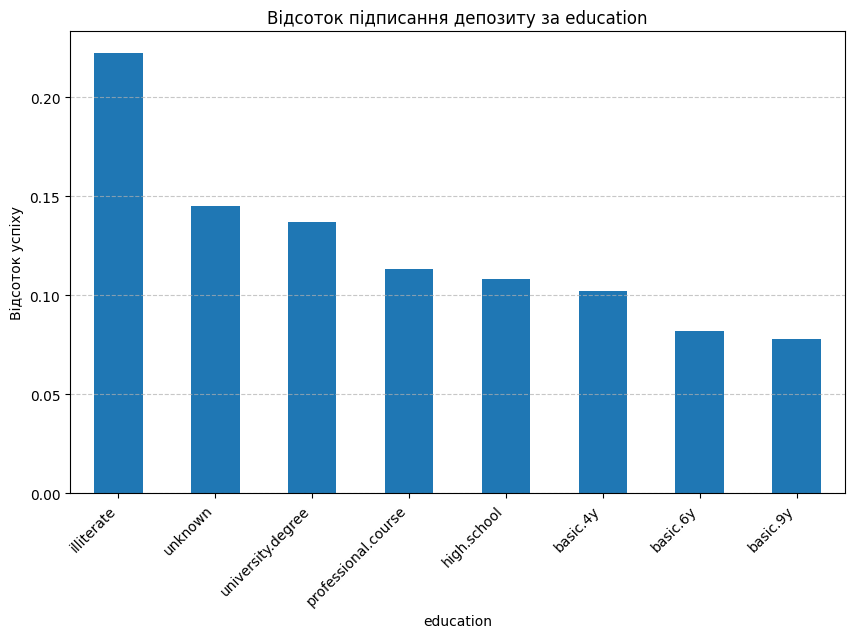

In [24]:
success_proportion(df, 'education')

### Кількість клієнтів, які підписали/не підписали депозит, за рівнем освіти

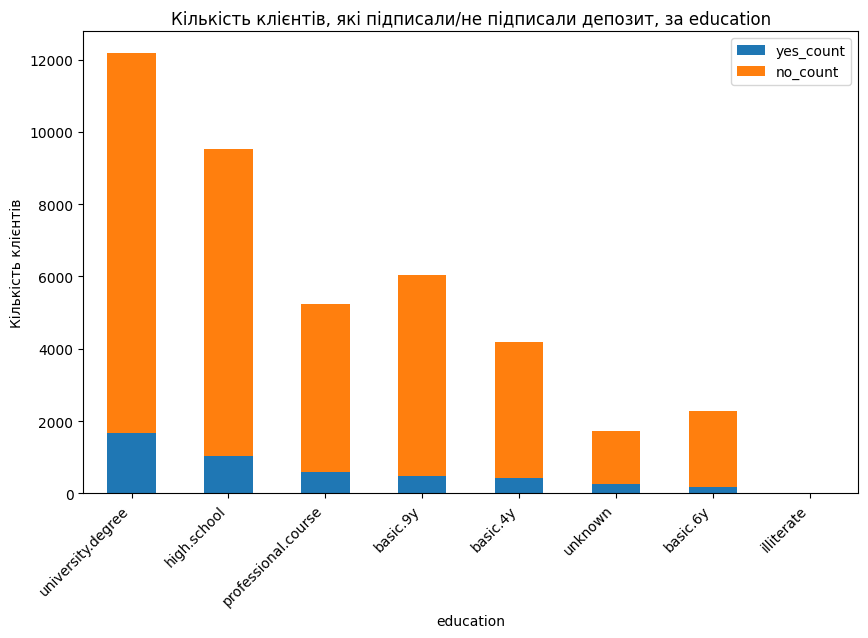

In [25]:
general_prportion(df, 'education')

**Спостереження**

- Найбільше клієнтів мають university.degree або high school освіту.

- Відсоток успіху для клієнтів з вищою освітою (university.degree) є одним з найвищих (13.7%). Дивно, але клієнти з невідомою освітою (unknown) та illiterate (неписьменні) також демонструють високий показник успіху (14.5% та 22.2%). Найнижчий показник — у basic.6y та basic.9y.

## Гіпотези

1. Існує нелінійний зв'язок між віком та ймовірністю підписання депозиту. Клієнти, які є дуже молодими (близько 20 років) або літніми (понад 60 років), більш схильні до оформлення депозиту, ніж клієнти середнього віку (30-50 років).

2. Професія є важливим предиктором, але для маркетингової стратегії важливі обидва показники. student та retired — це перспективні ніші з високою конверсією. Водночас, admin. та technician є цільовими масовими сегментами, оскільки вони становлять найбільшу кількість потенційних клієнтів. Таким чином, маркетингові зусилля можуть бути спрямовані як на висококонверсійні ніші, так і на великі сегменти з помірною конверсією, щоб максимізувати загальний прибуток.

3. Сімейний стан впливає на ймовірність оформлення депозиту. Самотня людина або людина з невідомим статусом більш схильна до підписання, можливо, через менші фінансові зобов'язання або індивідуальні фінансові рішення.

4. Але найбільший обсяг успішних продажів припадає на клієнтів у статусі married. Це вказує на те, що банк має сконцентруватися на стратегіях, орієнтованих на сім'ї або на індивідуальні фінансові потреби в рамках сім'ї.

5. Рівень освіти не має прямої лінійної кореляції з ймовірністю підписання. Хоча вища освіта може вказувати на кращу фінансову грамотність, особи з невідомою/нижчою освітою також є цінним сегментом для маркетингу. Це може свідчити, що інші фактори (наприклад, вік, професія або фінансові показники) мають значніший вплив для цих груп.

## Вибір методів

- Почнемо з Логістичної регресії, щоб мати базову модель (baseline), яку легко інтерпретувати та пояснити.

- Потім використаємо більш потужні моделі, такі як Decision Tree та XGBoost, для досягнення кращої продуктивності. Це дозволить порівняти, чи виправдане ускладнення моделі збільшенням точності.

## Вибір метрики оцінки якості моделі

З огляду на сильний дисбаланс класів (лише 11% клієнтів підписали депозит), традиційна точність (accuracy) не підходить. Модель, яка просто завжди прогнозуватиме "ні" (no), досягне точності 89%, але при цьому буде абсолютно марною, оскільки не знайде жодного клієнта, який би погодився на депозит.

Якщо обирати основну метрику оцінку між Precision, Recall, F1-Score та ROC AUC, я зупиню вибір на останній. Ця метрика є найдійною для дисбалансованих класів. Але не зайвим все одно буде звернути увагу на Precision, Recall та F1-Score, щоб зрозуміти, як модель поводиться з урахуванням бізнес-цілей. Наприклад, якщо банк хоче мінімізувати кількість "холодних" дзвінків, пріоритет може бути наданий моделі з вищим Precision. Якщо мета — не пропустити жодного потенційного клієнта, тоді важливішим стає Recall.

# Препроцесинг даних

## Обробка пропущених значень та групування категорій

З попереднього аналізу `df.info()` бачимо, що явних пропусків немає. Однак, деякі категоріальні змінні мають значення 'unknown'. Це, по суті, пропущене значення, яке потребує обробки.

**Змінна `education`**: У цій змінній є кілька категорій, які можна об'єднати, щоб зменшити кількість ознак, наприклад, basic.4y, basic.6y, basic.9y можна згрупувати в одну категорію 'basic'.

**Змінні `default`, `housing`, `loan`**: Ці змінні мають значення 'yes', 'no' та 'unknown'. Категорію 'unknown' вважаю можно замінити на найчастіше значення.


In [31]:
df['education'] = df['education'].replace(['basic.4y', 'basic.6y', 'basic.9y'], 'basic')
df['education'] = df['education'].replace('unknown', 'basic')

In [32]:
for col in ['default', 'loan']:
    df[col] = df[col].replace('unknown', 'no')

df['housing'] = df['housing'].replace('unknown', 'yes')

## Виявлення та обробка викидів

### Вік

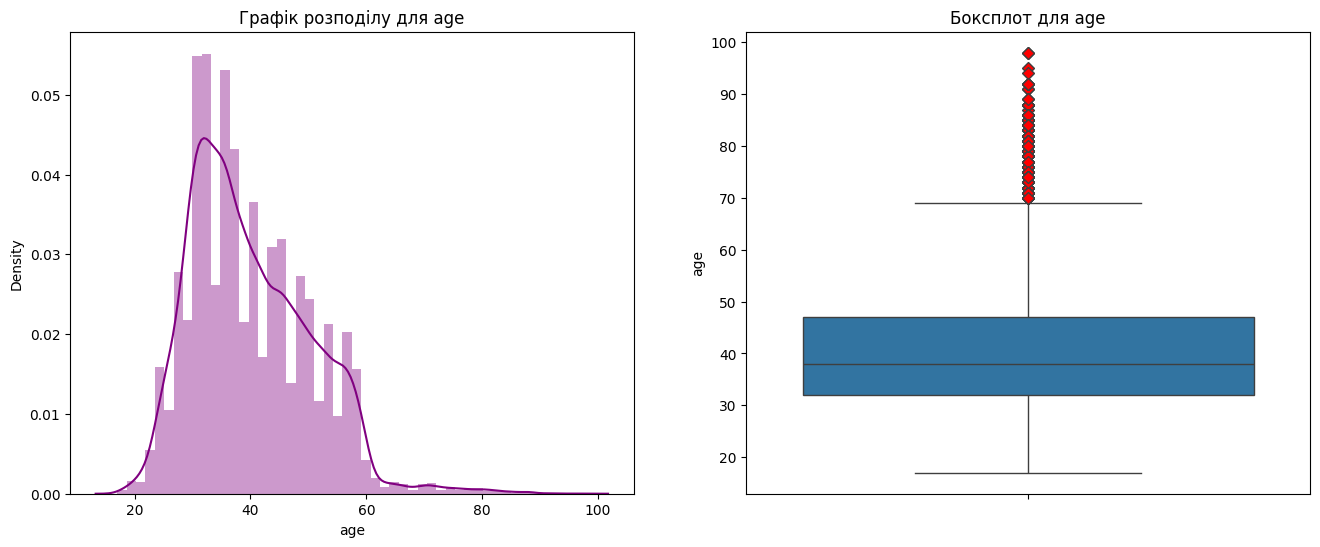

In [37]:
dist_box(df,'age')

**Спостереження**

Графік розподілу показує нормальний розподіл з невеликим зсувом. Боксплот вказує на наявність значної кількості викидів у бік старшого віку (після ~70 років), що є логічним, оскільки в банку менше клієнтів похилого віку.

**Рішення**

Не потрібно нічого робити з цими викидами. Ці значення не є помилковими даними, а відображають реальну картину. Ми вже з'ясували в EDA, що старші клієнти можуть мати вищий рівень конверсії, тому їх видалення або обрізання може призвести до втрати важливої інформації.

### Тривалість дзвінка

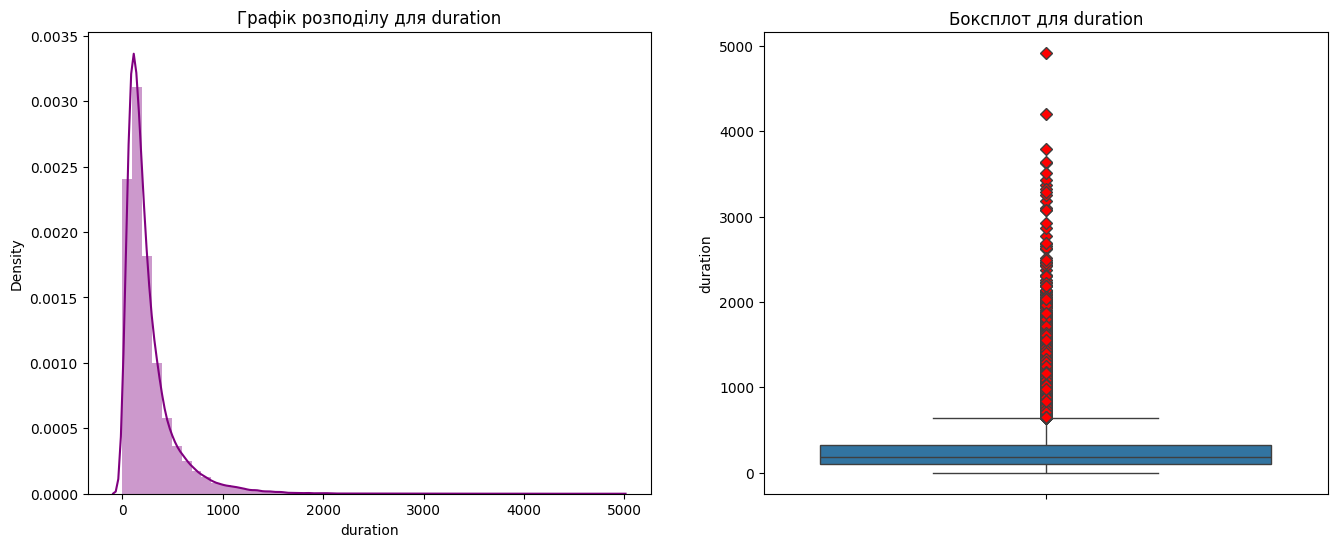

In [38]:
dist_box(df,'duration')

**Спостереження**

Розподіл сильно зміщений вліво з великою кількістю викидів. Боксплот показує значний розкид значень, а медіана знаходиться дуже близько до нуля.

**Рішення**

Як вже було зазначено в описі завдання, цю змінну слід виключити з фінальної моделі, оскільки її значення стає відомим лише після того, як результат (y) вже визначено.

In [39]:
df = df.drop('duration', axis=1)

### Кількість контактів

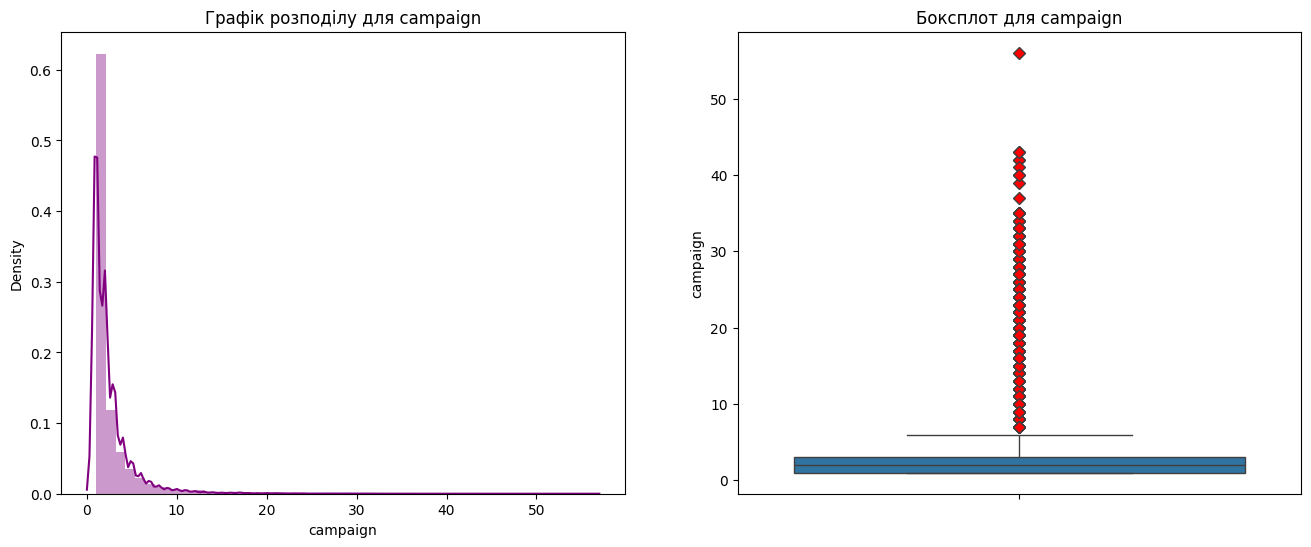

In [40]:
dist_box(df,'campaign')

**Спостереження**

Розподіл для змінної campaign сильно зміщений вліво, з більшістю значень, що зосереджені між 1 і 5. Боксплот чітко показує велику кількість викидів, які є значно вищими за основний діапазон даних. Це означає, що хоча більшість клієнтів отримують лише декілька дзвінків, є невелика група, яку банк намагався контактувати дуже багато разів.

**Рішення**

Як і у випадку з `age`, ці викиди не є помилковими даними. Вони відображають реальну картину: є клієнти, які вимагають більше зусиль для контакту. Видалення таких записів може призвести до втрати важливої інформації, яка може бути корисною для моделі.

### Кількість днів після попереднього контакту

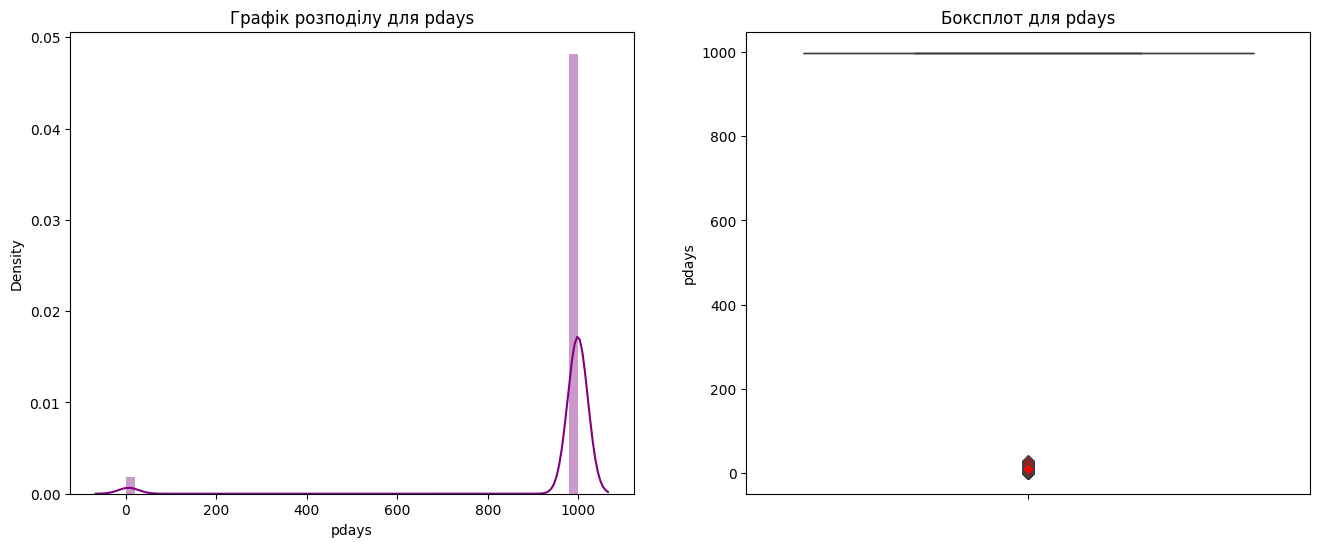

In [41]:
dist_box(df,'pdays')

**Спостереження**

Графік розподілу має два явні піки: один біля нуля і один на 999. Боксплот показує єдине значення 999 як викид. За описом, 999 означає, що клієнт раніше не контактувався.

**Рішення**

Це не класичний викид, а спеціальна категорія. Найкращим підходом є заміна значення 999 на -1. Це дозволяє моделі розрізняти клієнтів, які були контактовані нещодавно, клієнтів, яких контактували давно, та тих, кого не контактували взагалі. Це перетворює змінну на щось на кшталт категоріальної-числової, що є більш інформативним для моделі.

In [42]:
df['pdays'] = df['pdays'].replace(999, -1)

### Кількість попередніх контактів

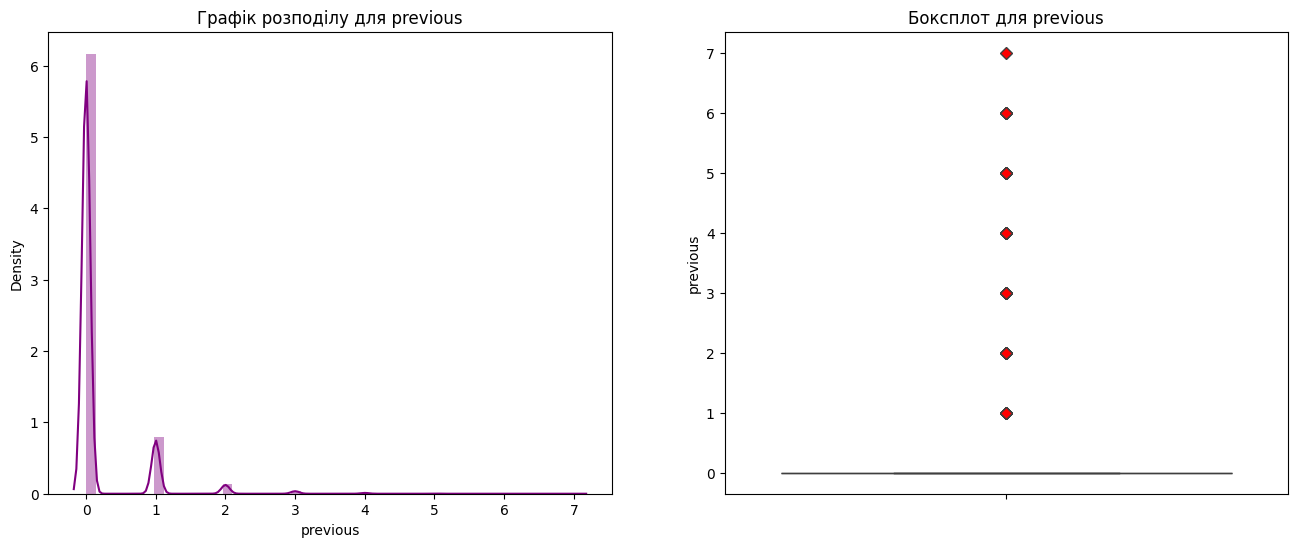

In [43]:
dist_box(df,'previous')

**Спостереження**

Графік розподілу показує, що більшість клієнтів мають 0 або 1 попередній контакт. Боксплот показує, що значення від 2 до 7 є викидами.

**Рішення**

Як і у випадку з віком, ці викиди не є помилковими даними. Вони відображають реальних клієнтів, які були контактовані багато разів. Видалення або зміна цих значень може призвести до втрати важливої інформації. Найкраще залишити ці дані як є.

### Соціально-економічні змінні

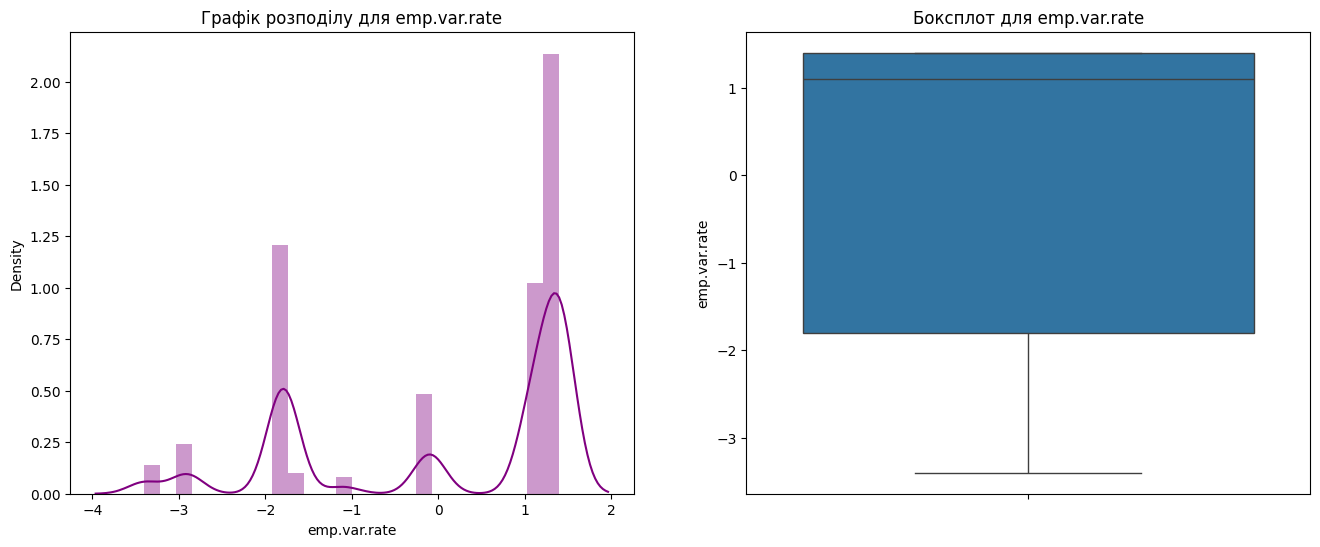

In [44]:
dist_box(df,'emp.var.rate')

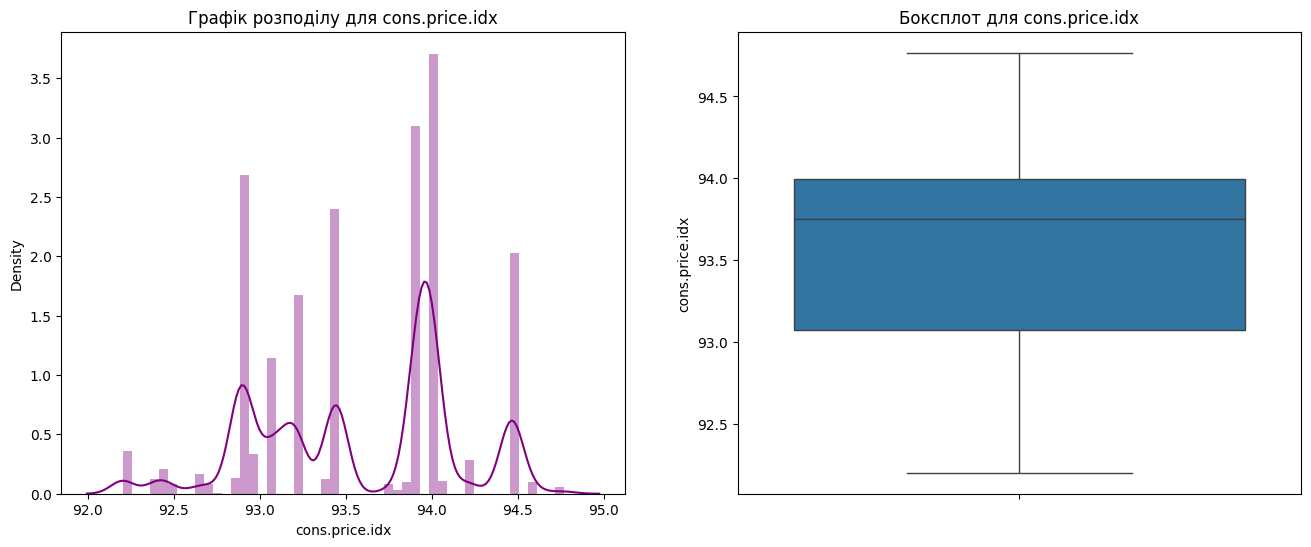

In [45]:
dist_box(df,'cons.price.idx')

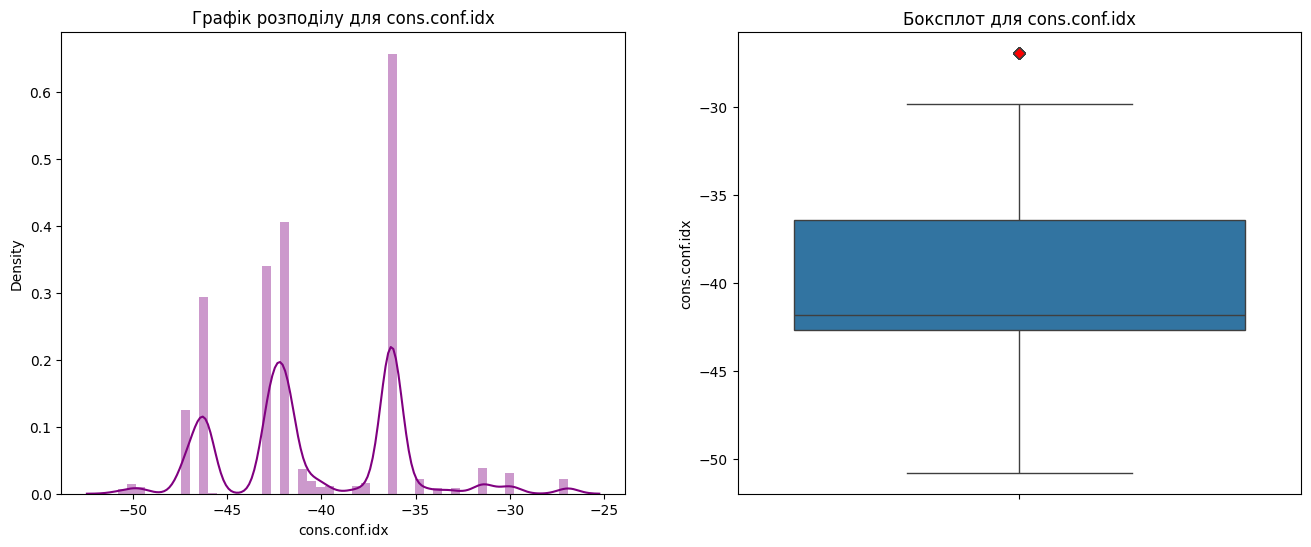

In [46]:
dist_box(df,'cons.conf.idx')

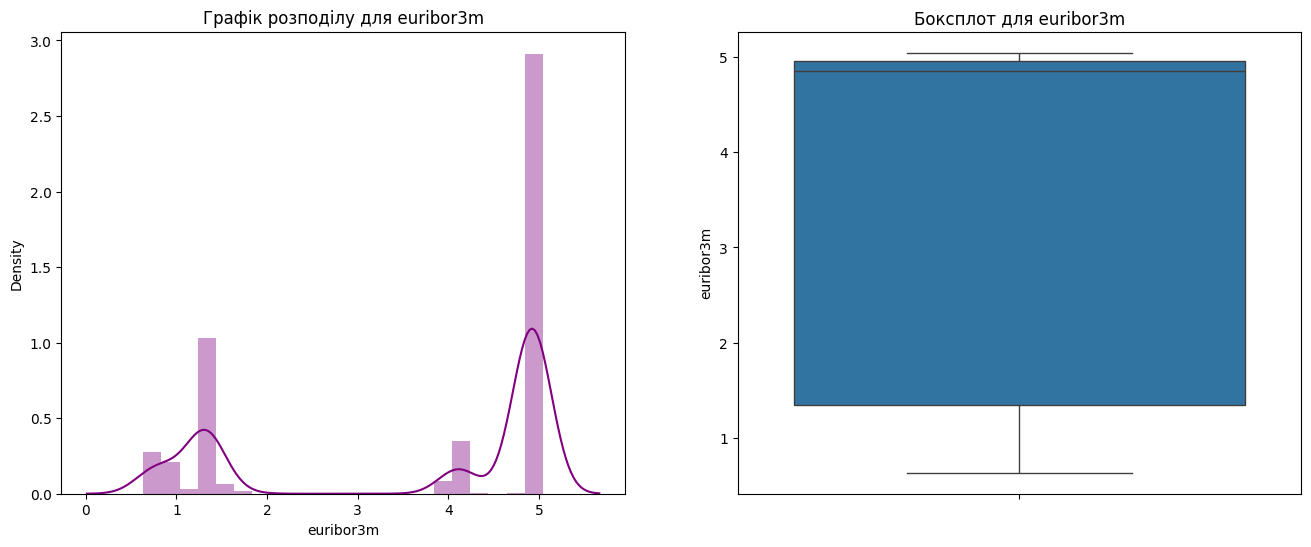

In [47]:
dist_box(df,'euribor3m')

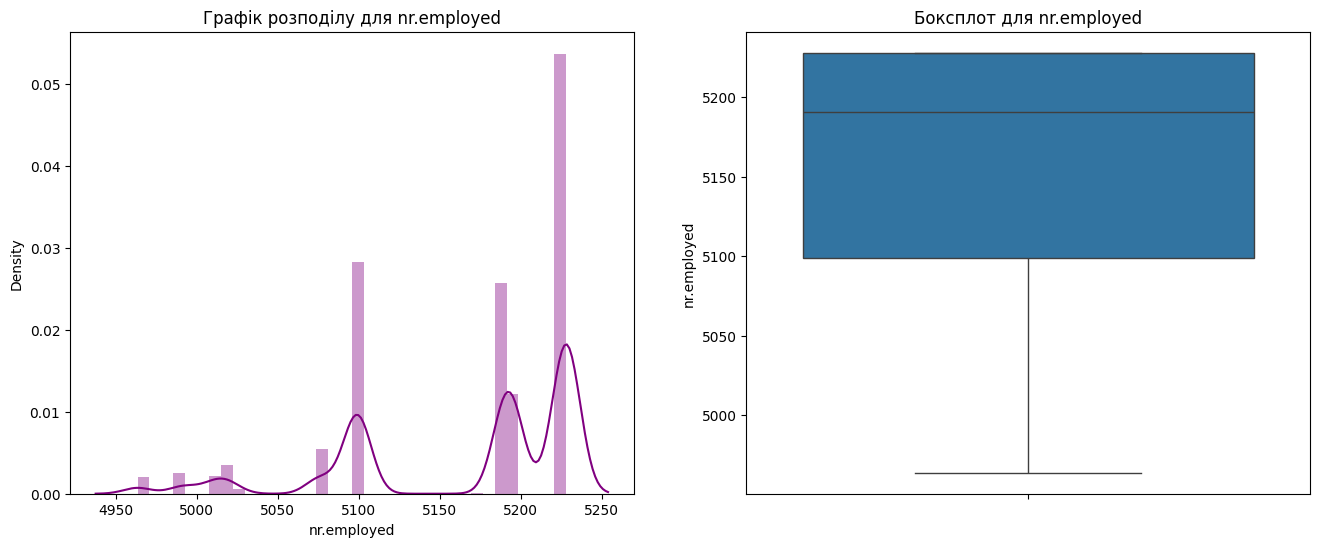

In [48]:
dist_box(df,'nr.employed')

**Спостереження**

Усі ці змінні мають розподіл, який не є класичним нормальним, а скоріше багатомодальним, з кількома піками. Боксплоти показують незначну кількість викидів, наприклад, у cons.conf.idx.

**Рішення**

Ці змінні є квартальними або місячними показниками, тому їх багатомодальний розподіл є очікуваним і відображає макроекономічні коливання. Викиди в цих змінних, як правило, є наслідком реальних подій і не повинні видалятися. Ці змінні слід залишити без змін, оскільки моделі на основі дерев рішень добре справляються з такими розподілами.

## Створення додаткових ознак

Ознака `age_group`: З EDA ми бачили, що зв'язок між `age` та `y` нелінійний. Можна створити групи, наприклад, молодь (<30), середній вік (30−60), пенсіонери (>60), та перетворити це на категоріальну змінну.

In [49]:
def get_age_group(age):
    if age < 30:
        return 'young'
    elif 30 <= age <= 60:
        return 'middle_aged'
    else:
        return 'senior'
df['age_group'] = df['age'].apply(get_age_group)

Щоб узагальнити інформацію про те, наскільки активно банк контактував з клієнтом у різних кампаніях можемо ще створити ознаку `contact_ratio`. Це співвідношення між кількістю контактів у поточній кампанії (`campaign`) та кількістю контактів у попередніх кампаніях (`previous`).

Створення такого співвідношення може дозволити моделі зрозуміти відносну інтенсивність контактів, а не просто їх абсолютну кількість.

In [50]:
df['contact_ratio'] = np.where(df['previous'] == 0,
                               df['campaign'],
                               df['campaign'] / df['previous'])

## Кодування категоріальних змінних

In [51]:
inputs = df.drop('y', axis=1)
targets = df['y'].map({'yes': 1, 'no': 0})
X_train, X_test, y_train, y_test = train_test_split(inputs, targets, test_size=0.2, random_state=12, stratify=targets)

In [52]:
X_train.select_dtypes(include = "object").columns

Index(['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact',
       'month', 'day_of_week', 'poutcome', 'age_group'],
      dtype='object')

#### Бінарні змінні

In [53]:
X_train['default'] = X_train['default'].map({'yes': 1, 'no': 0})
X_train['housing'] = X_train['housing'].map({'yes': 1, 'no': 0})
X_train['loan'] = X_train['loan'].map({'yes': 1, 'no': 0})

X_test['default'] = X_test['default'].map({'yes': 1, 'no': 0})
X_test['housing'] = X_test['housing'].map({'yes': 1, 'no': 0})
X_test['loan'] = X_test['loan'].map({'yes': 1, 'no': 0})

### Датасет для логістичної регресії

#### Мультикатегоріальні змінні

In [54]:
columns_to_encode = ['job', 'marital', 'education', 'poutcome', 'age_group', 'contact']

In [55]:
X_train_ohe = pd.get_dummies(X_train[columns_to_encode], columns=columns_to_encode, prefix=columns_to_encode, drop_first=True)
X_test_ohe = pd.get_dummies(X_test[columns_to_encode], columns=columns_to_encode, prefix=columns_to_encode, drop_first=True)

##### Month / Day of the week

In [56]:
month_categories = ['jan', 'feb', 'mar', 'apr', 'may', 'jun', 'jul', 'aug', 'sep', 'oct', 'nov', 'dec']

month_ordenc = OrdinalEncoder(categories=[month_categories])
month_ordenc.fit(X_train[['month']])

X_train_ohe['month_code'] = month_ordenc.transform(X_train[['month']])
X_test_ohe['month_code'] = month_ordenc.transform(X_test[['month']])

In [57]:
day_categories = ['mon', 'tue', 'wed', 'thu', 'fri']

day_ordenc = OrdinalEncoder(categories=[day_categories])
day_ordenc.fit(X_train[['day_of_week']])

X_train_ohe['day_of_week_code'] = day_ordenc.transform(X_train[['day_of_week']])
X_test_ohe['day_of_week_code'] = day_ordenc.transform(X_test[['day_of_week']])

#### Масштабування

In [58]:
numeric_cols = ['age', 'campaign', 'pdays', 'previous', 'emp.var.rate', 'cons.price.idx', 'cons.conf.idx', 'euribor3m', 'nr.employed', 'contact_ratio']
binary_cols = ['default', 'housing', 'loan']

In [75]:
scaler = StandardScaler()
X_train_scaled_numeric = pd.DataFrame(scaler.fit_transform(X_train[numeric_cols]), columns=numeric_cols)
X_test_scaled_numeric = pd.DataFrame(scaler.transform(X_test[numeric_cols]), columns=numeric_cols)

#### Фінальне об'єднання даних

In [60]:
X_train_final = pd.concat([X_train_ohe.reset_index(drop=True), X_train[binary_cols].reset_index(drop=True), X_train_scaled_numeric.reset_index(drop=True)], axis=1)
X_test_final = pd.concat([X_test_ohe.reset_index(drop=True), X_test[binary_cols].reset_index(drop=True), X_test_scaled_numeric.reset_index(drop=True)], axis=1)

### Датасет для дерев (LabelEncoder)

In [61]:
categorical_cols = X_train.select_dtypes(include = "object").columns

In [62]:
categorical_cols

Index(['job', 'marital', 'education', 'contact', 'month', 'day_of_week',
       'poutcome', 'age_group'],
      dtype='object')

In [63]:
X_train_xgb = X_train.copy()
X_test_xgb = X_test.copy()

le = LabelEncoder()

for col in categorical_cols:
    X_train_xgb[col] = le.fit_transform(X_train_xgb[col])
    X_test_xgb[col] = le.transform(X_test_xgb[col])

X_train_xgb = X_train_xgb.drop('y_numeric', axis=1)
X_test_xgb = X_test_xgb.drop('y_numeric', axis=1)

y_train_xgb = le.fit_transform(y_train)
y_test_xgb = le.transform(y_test)

# Навчання моделей

## Logistic Regression

In [64]:
log_reg = LogisticRegression(random_state=42, solver='liblinear')
log_reg.fit(X_train_final, y_train)

# Оцінка на валідаційному (тестовому) наборі
y_pred_test = log_reg.predict(X_test_final)
y_pred_proba_test = log_reg.predict_proba(X_test_final)[:, 1]

accuracy_test = accuracy_score(y_test, y_pred_test)
precision_test = precision_score(y_test, y_pred_test)
recall_test = recall_score(y_test, y_pred_test)
roc_auc_test = roc_auc_score(y_test, y_pred_proba_test)

print("Метрики для моделі Logistic Regression (валідаційний набір):")
print(f"Точність (Accuracy): {accuracy_test:.4f}")
print(f"Точність (Precision): {precision_test:.4f}")
print(f"Повнота (Recall): {recall_test:.4f}")
print(f"ROC AUC: {roc_auc_test:.4f}")

# Оцінка на тренувальному наборі
y_pred_train = log_reg.predict(X_train_final)
y_pred_proba_train = log_reg.predict_proba(X_train_final)[:, 1]

accuracy_train = accuracy_score(y_train, y_pred_train)
precision_train = precision_score(y_train, y_pred_train)
recall_train = recall_score(y_train, y_pred_train)
roc_auc_train = roc_auc_score(y_train, y_pred_proba_train)

print("\nМетрики для моделі Logistic Regression (тренувальний набір):")
print(f"Точність (Accuracy): {accuracy_train:.4f}")
print(f"Точність (Precision): {precision_train:.4f}")
print(f"Повнота (Recall): {recall_train:.4f}")
print(f"ROC AUC: {roc_auc_train:.4f}")

Метрики для моделі Logistic Regression (валідаційний набір):
Точність (Accuracy): 0.8982
Точність (Precision): 0.6508
Повнота (Recall): 0.2069
ROC AUC: 0.7843

Метрики для моделі Logistic Regression (тренувальний набір):
Точність (Accuracy): 0.8995
Точність (Precision): 0.6727
Повнота (Recall): 0.2099
ROC AUC: 0.7820


## kNN

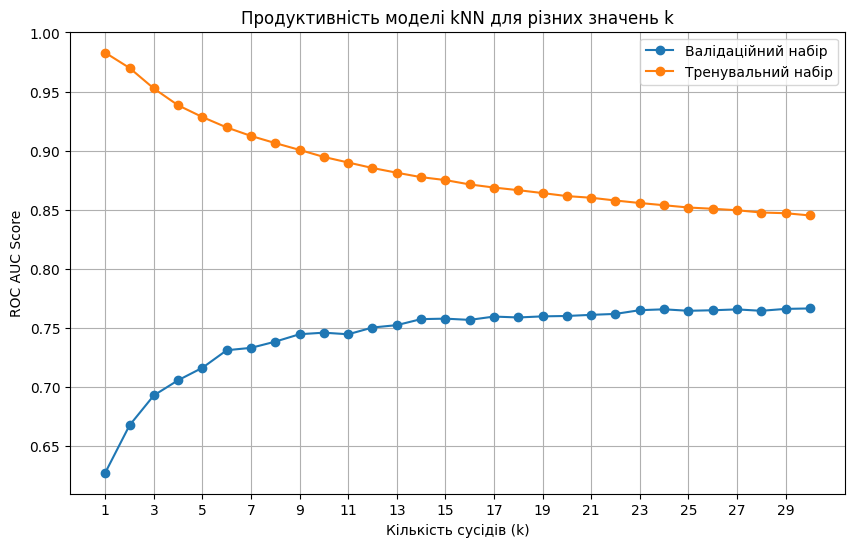

Оптимальне значення k на валідаційному наборі: 30

Метрики для оптимальної моделі kNN (валідаційний набір):
Точність (Accuracy): 0.8963
Точність (Precision): 0.6149
Повнота (Recall): 0.2134
ROC AUC: 0.7666

Метрики для оптимальної моделі kNN (тренувальний набір):
Точність (Accuracy): 0.9026
Точність (Precision): 0.6924
Повнота (Recall): 0.2438
ROC AUC: 0.8452


In [65]:
k_values = range(1, 31)

roc_auc_scores_test = []
accuracy_scores_test = []
precision_scores_test = []
recall_scores_test = []

roc_auc_scores_train = []
accuracy_scores_train = []
precision_scores_train = []
recall_scores_train = []

for k in k_values:
    knn_model = KNeighborsClassifier(n_neighbors=k)

    knn_model.fit(X_train_final, y_train)

    y_pred_test = knn_model.predict(X_test_final)
    y_pred_proba_test = knn_model.predict_proba(X_test_final)[:, 1]

    roc_auc_scores_test.append(roc_auc_score(y_test, y_pred_proba_test))
    accuracy_scores_test.append(accuracy_score(y_test, y_pred_test))
    precision_scores_test.append(precision_score(y_test, y_pred_test))
    recall_scores_test.append(recall_score(y_test, y_pred_test))

    y_pred_train = knn_model.predict(X_train_final)
    y_pred_proba_train = knn_model.predict_proba(X_train_final)[:, 1]

    roc_auc_scores_train.append(roc_auc_score(y_train, y_pred_proba_train))
    accuracy_scores_train.append(accuracy_score(y_train, y_pred_train))
    precision_scores_train.append(precision_score(y_train, y_pred_train))
    recall_scores_train.append(recall_score(y_train, y_pred_train))

plt.figure(figsize=(10, 6))
plt.plot(k_values, roc_auc_scores_test, marker='o', label='Валідаційний набір')
plt.plot(k_values, roc_auc_scores_train, marker='o', label='Тренувальний набір')
plt.xlabel('Кількість сусідів (k)')
plt.ylabel('ROC AUC Score')
plt.title('Продуктивність моделі kNN для різних значень k')
plt.xticks(np.arange(1, 31, 2))
plt.grid(True)
plt.legend()
plt.show()

optimal_k_index = np.argmax(roc_auc_scores_test)
optimal_k = k_values[optimal_k_index]
print(f"Оптимальне значення k на валідаційному наборі: {optimal_k}")

print("\nМетрики для оптимальної моделі kNN (валідаційний набір):")
print(f"Точність (Accuracy): {accuracy_scores_test[optimal_k_index]:.4f}")
print(f"Точність (Precision): {precision_scores_test[optimal_k_index]:.4f}")
print(f"Повнота (Recall): {recall_scores_test[optimal_k_index]:.4f}")
print(f"ROC AUC: {roc_auc_scores_test[optimal_k_index]:.4f}")

print("\nМетрики для оптимальної моделі kNN (тренувальний набір):")
print(f"Точність (Accuracy): {accuracy_scores_train[optimal_k_index]:.4f}")
print(f"Точність (Precision): {precision_scores_train[optimal_k_index]:.4f}")
print(f"Повнота (Recall): {recall_scores_train[optimal_k_index]:.4f}")
print(f"ROC AUC: {roc_auc_scores_train[optimal_k_index]:.4f}")

## Decision Tree

/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


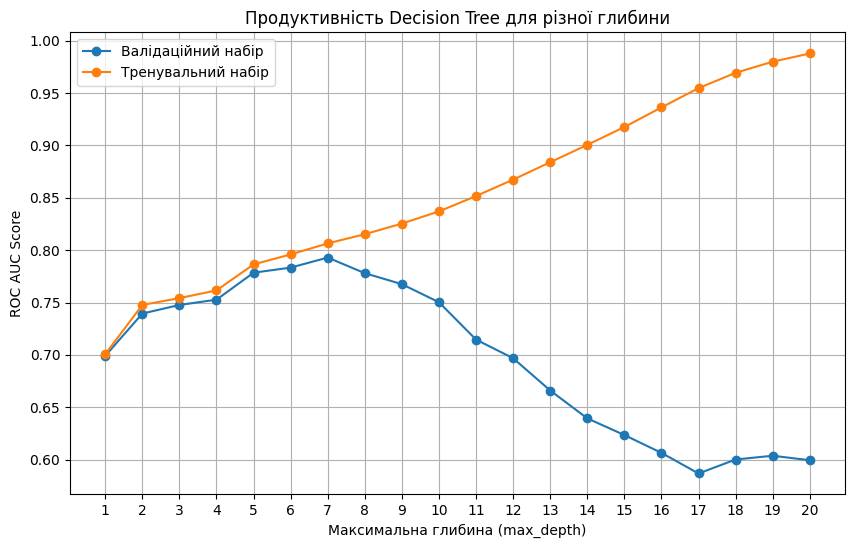

Оптимальна максимальна глибина: 7

Метрики для оптимальної моделі Decision Tree (валідаційний набір):
Точність (Accuracy): 0.8988
Точність (Precision): 0.6098
Повнота (Recall): 0.2812
ROC AUC: 0.7929

Метрики для оптимальної моделі Decision Tree (тренувальний набір):
Точність (Accuracy): 0.9075
Точність (Precision): 0.7133
Повнота (Recall): 0.2996
ROC AUC: 0.8065


In [66]:
max_depths = range(1, 21)

roc_auc_scores_test = []
accuracy_scores_test = []
precision_scores_test = []
recall_scores_test = []

roc_auc_scores_train = []
accuracy_scores_train = []
precision_scores_train = []
recall_scores_train = []

for depth in max_depths:
    dt_model = DecisionTreeClassifier(random_state=42, max_depth=depth)

    dt_model.fit(X_train_xgb, y_train_xgb)

    y_pred_test = dt_model.predict(X_test_xgb)
    y_pred_proba_test = dt_model.predict_proba(X_test_xgb)[:, 1]

    roc_auc_scores_test.append(roc_auc_score(y_test_xgb, y_pred_proba_test))
    accuracy_scores_test.append(accuracy_score(y_test_xgb, y_pred_test))
    precision_scores_test.append(precision_score(y_test_xgb, y_pred_test))
    recall_scores_test.append(recall_score(y_test_xgb, y_pred_test))

    y_pred_train = dt_model.predict(X_train_xgb)
    y_pred_proba_train = dt_model.predict_proba(X_train_xgb)[:, 1]

    roc_auc_scores_train.append(roc_auc_score(y_train_xgb, y_pred_proba_train))
    accuracy_scores_train.append(accuracy_score(y_train_xgb, y_pred_train))
    precision_scores_train.append(precision_score(y_train_xgb, y_pred_train))
    recall_scores_train.append(recall_score(y_train_xgb, y_pred_train))

plt.figure(figsize=(10, 6))
plt.plot(max_depths, roc_auc_scores_test, marker='o', label='Валідаційний набір')
plt.plot(max_depths, roc_auc_scores_train, marker='o', label='Тренувальний набір')
plt.xlabel('Максимальна глибина (max_depth)')
plt.ylabel('ROC AUC Score')
plt.title('Продуктивність Decision Tree для різної глибини')
plt.xticks(max_depths)
plt.grid(True)
plt.legend()
plt.show()

optimal_depth_index = np.argmax(roc_auc_scores_test)
optimal_depth = max_depths[optimal_depth_index]
print(f"Оптимальна максимальна глибина: {optimal_depth}")

print("\nМетрики для оптимальної моделі Decision Tree (валідаційний набір):")
print(f"Точність (Accuracy): {accuracy_scores_test[optimal_depth_index]:.4f}")
print(f"Точність (Precision): {precision_scores_test[optimal_depth_index]:.4f}")
print(f"Повнота (Recall): {recall_scores_test[optimal_depth_index]:.4f}")
print(f"ROC AUC: {roc_auc_scores_test[optimal_depth_index]:.4f}")

print("\nМетрики для оптимальної моделі Decision Tree (тренувальний набір):")
print(f"Точність (Accuracy): {accuracy_scores_train[optimal_depth_index]:.4f}")
print(f"Точність (Precision): {precision_scores_train[optimal_depth_index]:.4f}")
print(f"Повнота (Recall): {recall_scores_train[optimal_depth_index]:.4f}")
print(f"ROC AUC: {roc_auc_scores_train[optimal_depth_index]:.4f}")

## XGBoost

In [67]:
xgb_model = xgb.XGBClassifier(
    objective='binary:logistic',
    n_estimators=100,
    learning_rate=0.1,
    max_depth=3,
    eval_metric='logloss',
    random_state=42
)

xgb_model.fit(X_train_xgb, y_train_xgb)

y_pred_xgb_test = xgb_model.predict(X_test_xgb)
y_pred_proba_xgb_test = xgb_model.predict_proba(X_test_xgb)[:, 1]

accuracy_xgb_test = accuracy_score(y_test_xgb, y_pred_xgb_test)
precision_xgb_test = precision_score(y_test_xgb, y_pred_xgb_test)
recall_xgb_test = recall_score(y_test_xgb, y_pred_xgb_test)
roc_auc_xgb_test = roc_auc_score(y_test_xgb, y_pred_proba_xgb_test)

print("Метрики для моделі XGBoost (валідаційний набір):")
print(f"Точність (Accuracy): {accuracy_xgb_test:.4f}")
print(f"Точність (Precision): {precision_xgb_test:.4f}")
print(f"Повнота (Recall): {recall_xgb_test:.4f}")
print(f"ROC AUC: {roc_auc_xgb_test:.4f}")

y_pred_xgb_train = xgb_model.predict(X_train_xgb)
y_pred_proba_xgb_train = xgb_model.predict_proba(X_train_xgb)[:, 1]

accuracy_xgb_train = accuracy_score(y_train_xgb, y_pred_xgb_train)
precision_xgb_train = precision_score(y_train_xgb, y_pred_xgb_train)
recall_xgb_train = recall_score(y_train_xgb, y_pred_xgb_train)
roc_auc_xgb_train = roc_auc_score(y_train_xgb, y_pred_proba_xgb_train)

print("\nМетрики для моделі XGBoost (тренувальний набір):")
print(f"Точність (Accuracy): {accuracy_xgb_train:.4f}")
print(f"Точність (Precision): {precision_xgb_train:.4f}")
print(f"Повнота (Recall): {recall_xgb_train:.4f}")
print(f"ROC AUC: {roc_auc_xgb_train:.4f}")

Метрики для моделі XGBoost (валідаційний набір):
Точність (Accuracy): 0.8992
Точність (Precision): 0.6541
Повнота (Recall): 0.2241
ROC AUC: 0.8032

Метрики для моделі XGBoost (тренувальний набір):
Точність (Accuracy): 0.9042
Точність (Precision): 0.7121
Повнота (Recall): 0.2519
ROC AUC: 0.8144


## Порівнянням якості моделей

In [68]:
pd.set_option('display.max_rows', None)  # Відображення всіх рядків
pd.set_option('display.max_columns', None)  # Відображення всіх колонок
pd.set_option('display.width', 1000)     # Збільшення загальної ширини таблиці
pd.set_option('display.max_colwidth', None) # Відображення повного тексту в колонках

data = {
    'Модель': ['Логістична регресія', 'kNN', 'Decision Tree', 'XGBoost'],
    'Гіперпараметри': [
        'solver=\'liblinear\', C=1.0 (default)',
        'n_neighbors=30',
        'max_depth=7',
        'n_estimators=100, learning_rate=0.1, max_depth=3'
    ],
    'ROC AUC (навчання)': [
        0.7820,
        0.8452,
        0.8065,
        0.8144
    ],
    'ROC AUC (валідація)': [
        0.7843,
        0.7666,
        0.7929,
        0.8032
    ],
    'Коментар': [
        'Хороший базовий результат. Модель проста і швидка. Результати на тренувальному та валідаційному наборах дуже близькі, що вказує на відсутність перенавчання. Варто використовувати як базову лінію (baseline).',
        'Найгірший результат з усіх моделей. Модель демонструє ознаки перенавчання. Різниця між ROC AUC на тренувальному та валідаційному наборах досить помітна. Оптимальне значення k=30 є досить високим, що вказує на те, що модель потребує великої кількості сусідів для стабілізації. Не варто використовувати для цих даних без подальших експериментів.',
        'Показала добрий результат. Може бути чудовою альтернативою. Є деяке перенавчання, але воно не критичне. Оптимальна глибина max_depth=7 свідчить про те, що для досягнення найкращого результату модель потребує більшої складності. Варто експериментувати з max_depth для запобігання перенавчанню.',
        'Найкращий результат з усіх моделей. Однозначно варто використовувати. Хоча є невелика різниця в продуктивності між тренувальним та валідаційним набором, це не є значним перенавчанням.'
    ],
    'Ідеї для покращення': [
        'Можна спробувати підібрати інші гіперпараметри, такі як C або penalty, щоб злегка покращити її продуктивність.',
        'Можна спробувати використати інші метрики відстані (наприклад, Manhattan або Chebyshev) замість стандартної Euclidean, а також застосувати ваговий коефіцієнт, щоб надати більшої ваги ближчим сусідам.',
        'Можна спробувати підібрати інші гіперпараметри, наприклад, min_samples_leaf або min_samples_split, щоб ще краще контролювати складність моделі і мінімізувати перенавчання.',
        'Для подальшого покращення можна провести більш глибокий підбір гіперпараметрів за допомогою GridSearchCV або RandomizedSearchCV, щоб знайти оптимальну комбінацію для ще кращих результатів.'
    ]
}

# Створення DataFrame
comparison_df = pd.DataFrame(data)

# Відображення таблиці
comparison_df

,Модель,Гіперпараметри,ROC AUC (навчання),ROC AUC (валідація),Коментар,Ідеї для покращення
0,Логістична регресія,"solver='liblinear', C=1.0 (default)",0.7820,0.7843,"Хороший базовий результат. Модель проста і швидка. Результати на тренувальному та валідаційному наборах дуже близькі, що вказує на відсутність перенавчання. Варто використовувати як базову лінію (baseline).","Можна спробувати підібрати інші гіперпараметри, такі як C або penalty, щоб злегка покращити її продуктивність."
1,kNN,n_neighbors=30,0.8452,0.7666,"Найгірший результат з усіх моделей. Модель демонструє ознаки перенавчання. Різниця між ROC AUC на тренувальному та валідаційному наборах досить помітна. Оптимальне значення k=30 є досить високим, що вказує на те, що модель потребує великої кількості сусідів для стабілізації. Не варто використовувати для цих даних без подальших експериментів.","Можна спробувати використати інші метрики відстані (наприклад, Manhattan або Chebyshev) замість стандартної Euclidean, а також застосувати ваговий коефіцієнт, щоб надати більшої ваги ближчим сусідам."
2,Decision Tree,max_depth=7,0.8065,0.7929,"Показала добрий результат. Може бути чудовою альтернативою. Є деяке перенавчання, але воно не критичне. Оптимальна глибина max_depth=7 свідчить про те, що для досягнення найкращого результату модель потребує більшої складності. Варто експериментувати з max_depth для запобігання перенавчанню.","Можна спробувати підібрати інші гіперпараметри, наприклад, min_samples_leaf або min_samples_split, щоб ще краще контролювати складність моделі і мінімізувати перенавчання."
3,XGBoost,"n_estimators=100, learning_rate=0.1, max_depth=3",0.8144,0.8032,"Найкращий результат з усіх моделей. Однозначно варто використовувати. Хоча є невелика різниця в продуктивності між тренувальним та валідаційним набором, це не є значним перенавчанням.","Для подальшого покращення можна провести більш глибокий підбір гіперпараметрів за допомогою GridSearchCV або RandomizedSearchCV, щоб знайти оптимальну комбінацію для ще кращих результатів."


# Тюнінг гіперпараметрів для XGBoost

## Randomized Search

In [76]:
param_dist = {
    'n_estimators': randint(50, 200),
    'learning_rate': uniform(0.01, 0.3),
    'max_depth': randint(2, 6),
    'subsample': uniform(0.6, 0.4),
    'colsample_bytree': uniform(0.6, 0.4),
    'gamma': uniform(0, 0.5)
}

xgb_model = xgb.XGBClassifier(
    objective='binary:logistic',
    eval_metric='logloss',
    use_label_encoder=False,
    random_state=42
)

random_search = RandomizedSearchCV(
    estimator=xgb_model,
    param_distributions=param_dist,
    n_iter=50,
    scoring='roc_auc',
    cv=3,
    verbose=1,
    n_jobs=-1,
    random_state=42
)

random_search.fit(X_train_xgb, y_train_xgb)

best_params_rs = random_search.best_params_
best_score_rs = random_search.best_score_

print("Найкращі гіперпараметри за допомогою Randomized Search:", best_params_rs)
print(f"Найкращий ROC AUC (крос-валідація): {best_score_rs:.4f}")

best_model_rs = random_search.best_estimator_
y_pred_proba_rs = best_model_rs.predict_proba(X_test_xgb)[:, 1]
roc_auc_rs = roc_auc_score(y_test_xgb, y_pred_proba_rs)

print(f"ROC AUC на валідаційному наборі з найкращими параметрами: {roc_auc_rs:.4f}")

Fitting 3 folds for each of 50 candidates, totalling 150 fits


/usr/local/lib/python3.12/dist-packages/xgboost/training.py:183: UserWarning: [09:06:00] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


Найкращі гіперпараметри за допомогою Randomized Search: {'colsample_bytree': np.float64(0.9906459823330611), 'gamma': np.float64(0.20551850665911564), 'learning_rate': np.float64(0.019915219870164515), 'max_depth': 5, 'n_estimators': 178, 'subsample': np.float64(0.695824756266789)}
Найкращий ROC AUC (крос-валідація): 0.8026
ROC AUC на валідаційному наборі з найкращими параметрами: 0.8036


## Bayesian Optimizatio

In [70]:
def objective(params):
    params['n_estimators'] = int(params['n_estimators'])
    params['max_depth'] = int(params['max_depth'])

    xgb_model = xgb.XGBClassifier(
        objective='binary:logistic',
        eval_metric='logloss',
        use_label_encoder=False,
        random_state=42,
        **params
    )

    xgb_model.fit(X_train_xgb, y_train_xgb)

    y_pred_proba = xgb_model.predict_proba(X_test_xgb)[:, 1]

    # Hyperopt шукає мінімум, тому ми повертаємо 1 - ROC AUC
    loss = 1 - roc_auc_score(y_test_xgb, y_pred_proba)

    return {'loss': loss, 'status': STATUS_OK}

In [71]:
space = {
    'n_estimators': hp.quniform('n_estimators', 50, 200, 1),
    'learning_rate': hp.loguniform('learning_rate', np.log(0.01), np.log(0.3)),
    'max_depth': hp.quniform('max_depth', 2, 6, 1),
    'subsample': hp.uniform('subsample', 0.6, 1.0),
    'colsample_bytree': hp.uniform('colsample_bytree', 0.6, 1.0),
    'gamma': hp.uniform('gamma', 0, 0.5)
}

trials = Trials()
best_hyperparams = fmin(
    fn=objective,
    space=space,
    algo=tpe.suggest,
    max_evals=50,  # Кількість ітерацій
    trials=trials
)

print("Найкращі гіперпараметри за допомогою Hyperopt:", best_hyperparams)

best_model_hyperopt = xgb.XGBClassifier(
    objective='binary:logistic',
    eval_metric='logloss',
    use_label_encoder=False,
    random_state=42,
    **{k: int(v) if k in ['n_estimators', 'max_depth'] else v for k, v in best_hyperparams.items()}
)
best_model_hyperopt.fit(X_train_xgb, y_train_xgb)
y_pred_proba_hyperopt = best_model_hyperopt.predict_proba(X_test_xgb)[:, 1]
roc_auc_hyperopt = roc_auc_score(y_test_xgb, y_pred_proba_hyperopt)

print(f"ROC AUC на валідаційному наборі з найкращими параметрами: {roc_auc_hyperopt:.4f}")

  0%|          | 0/50 [00:00<?, ?trial/s, best loss=?]

/usr/local/lib/python3.12/dist-packages/xgboost/training.py:183: UserWarning: [08:56:23] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)



  2%|▏         | 1/50 [00:00<00:16,  2.90trial/s, best loss: 0.20022627836218687]

/usr/local/lib/python3.12/dist-packages/xgboost/training.py:183: UserWarning: [08:56:23] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)



  6%|▌         | 3/50 [00:01<00:16,  2.86trial/s, best loss: 0.19572120147176753]

/usr/local/lib/python3.12/dist-packages/xgboost/training.py:183: UserWarning: [08:56:24] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)

/usr/local/lib/python3.12/dist-packages/xgboost/training.py:183: UserWarning: [08:56:24] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)



  8%|▊         | 4/50 [00:01<00:15,  3.05trial/s, best loss: 0.19572120147176753]

/usr/local/lib/python3.12/dist-packages/xgboost/training.py:183: UserWarning: [08:56:24] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)



 10%|█         | 5/50 [00:01<00:15,  2.97trial/s, best loss: 0.19572120147176753]

/usr/local/lib/python3.12/dist-packages/xgboost/training.py:183: UserWarning: [08:56:25] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)



 12%|█▏        | 6/50 [00:02<00:15,  2.82trial/s, best loss: 0.19572120147176753]

/usr/local/lib/python3.12/dist-packages/xgboost/training.py:183: UserWarning: [08:56:25] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)



 14%|█▍        | 7/50 [00:02<00:14,  3.05trial/s, best loss: 0.19572120147176753]

/usr/local/lib/python3.12/dist-packages/xgboost/training.py:183: UserWarning: [08:56:25] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)



 16%|█▌        | 8/50 [00:02<00:15,  2.68trial/s, best loss: 0.19572120147176753]

/usr/local/lib/python3.12/dist-packages/xgboost/training.py:183: UserWarning: [08:56:26] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)



 18%|█▊        | 9/50 [00:03<00:14,  2.84trial/s, best loss: 0.19572120147176753]

/usr/local/lib/python3.12/dist-packages/xgboost/training.py:183: UserWarning: [08:56:26] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)



 20%|██        | 10/50 [00:03<00:19,  2.10trial/s, best loss: 0.19513022430303317]

/usr/local/lib/python3.12/dist-packages/xgboost/training.py:183: UserWarning: [08:56:27] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)



 22%|██▏       | 11/50 [00:04<00:19,  2.01trial/s, best loss: 0.19513022430303317]

/usr/local/lib/python3.12/dist-packages/xgboost/training.py:183: UserWarning: [08:56:27] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)



 24%|██▍       | 12/50 [00:04<00:17,  2.12trial/s, best loss: 0.19513022430303317]

/usr/local/lib/python3.12/dist-packages/xgboost/training.py:183: UserWarning: [08:56:28] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)



 26%|██▌       | 13/50 [00:05<00:17,  2.09trial/s, best loss: 0.19513022430303317]

/usr/local/lib/python3.12/dist-packages/xgboost/training.py:183: UserWarning: [08:56:29] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)



 28%|██▊       | 14/50 [00:06<00:21,  1.66trial/s, best loss: 0.19513022430303317]

/usr/local/lib/python3.12/dist-packages/xgboost/training.py:183: UserWarning: [08:56:29] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)



 30%|███       | 15/50 [00:06<00:17,  1.95trial/s, best loss: 0.19513022430303317]

/usr/local/lib/python3.12/dist-packages/xgboost/training.py:183: UserWarning: [08:56:30] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)



 32%|███▏      | 16/50 [00:07<00:18,  1.82trial/s, best loss: 0.19513022430303317]

/usr/local/lib/python3.12/dist-packages/xgboost/training.py:183: UserWarning: [08:56:30] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)



 34%|███▍      | 17/50 [00:07<00:17,  1.92trial/s, best loss: 0.19513022430303317]

/usr/local/lib/python3.12/dist-packages/xgboost/training.py:183: UserWarning: [08:56:31] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)



 38%|███▊      | 19/50 [00:08<00:14,  2.20trial/s, best loss: 0.19513022430303317]

/usr/local/lib/python3.12/dist-packages/xgboost/training.py:183: UserWarning: [08:56:31] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)

/usr/local/lib/python3.12/dist-packages/xgboost/training.py:183: UserWarning: [08:56:31] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)



 40%|████      | 20/50 [00:08<00:12,  2.31trial/s, best loss: 0.19476729444785124]

/usr/local/lib/python3.12/dist-packages/xgboost/training.py:183: UserWarning: [08:56:32] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)



 42%|████▏     | 21/50 [00:09<00:12,  2.29trial/s, best loss: 0.19476729444785124]

/usr/local/lib/python3.12/dist-packages/xgboost/training.py:183: UserWarning: [08:56:32] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)



 44%|████▍     | 22/50 [00:10<00:19,  1.43trial/s, best loss: 0.19476729444785124]

/usr/local/lib/python3.12/dist-packages/xgboost/training.py:183: UserWarning: [08:56:34] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)



 46%|████▌     | 23/50 [00:11<00:18,  1.47trial/s, best loss: 0.19476729444785124]

/usr/local/lib/python3.12/dist-packages/xgboost/training.py:183: UserWarning: [08:56:34] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)



 48%|████▊     | 24/50 [00:13<00:28,  1.09s/trial, best loss: 0.19476729444785124]

/usr/local/lib/python3.12/dist-packages/xgboost/training.py:183: UserWarning: [08:56:36] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)



 50%|█████     | 25/50 [00:13<00:22,  1.10trial/s, best loss: 0.19476729444785124]

/usr/local/lib/python3.12/dist-packages/xgboost/training.py:183: UserWarning: [08:56:37] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)



 52%|█████▏    | 26/50 [00:14<00:20,  1.19trial/s, best loss: 0.19476729444785124]

/usr/local/lib/python3.12/dist-packages/xgboost/training.py:183: UserWarning: [08:56:37] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)



 54%|█████▍    | 27/50 [00:14<00:15,  1.48trial/s, best loss: 0.19476729444785124]

/usr/local/lib/python3.12/dist-packages/xgboost/training.py:183: UserWarning: [08:56:38] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)



 56%|█████▌    | 28/50 [00:15<00:13,  1.65trial/s, best loss: 0.19476729444785124]

/usr/local/lib/python3.12/dist-packages/xgboost/training.py:183: UserWarning: [08:56:38] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)



 58%|█████▊    | 29/50 [00:15<00:11,  1.87trial/s, best loss: 0.19476729444785124]

/usr/local/lib/python3.12/dist-packages/xgboost/training.py:183: UserWarning: [08:56:39] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)



 60%|██████    | 30/50 [00:15<00:09,  2.10trial/s, best loss: 0.19476729444785124]

/usr/local/lib/python3.12/dist-packages/xgboost/training.py:183: UserWarning: [08:56:39] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)



 64%|██████▍   | 32/50 [00:16<00:07,  2.26trial/s, best loss: 0.19476729444785124]

/usr/local/lib/python3.12/dist-packages/xgboost/training.py:183: UserWarning: [08:56:40] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)

/usr/local/lib/python3.12/dist-packages/xgboost/training.py:183: UserWarning: [08:56:40] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)



 66%|██████▌   | 33/50 [00:17<00:07,  2.35trial/s, best loss: 0.19476729444785124]

/usr/local/lib/python3.12/dist-packages/xgboost/training.py:183: UserWarning: [08:56:40] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)



 68%|██████▊   | 34/50 [00:17<00:06,  2.32trial/s, best loss: 0.19476729444785124]

/usr/local/lib/python3.12/dist-packages/xgboost/training.py:183: UserWarning: [08:56:41] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)



 70%|███████   | 35/50 [00:18<00:06,  2.27trial/s, best loss: 0.19476729444785124]

/usr/local/lib/python3.12/dist-packages/xgboost/training.py:183: UserWarning: [08:56:41] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)



 72%|███████▏  | 36/50 [00:18<00:07,  1.91trial/s, best loss: 0.19476729444785124]

/usr/local/lib/python3.12/dist-packages/xgboost/training.py:183: UserWarning: [08:56:42] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)



 74%|███████▍  | 37/50 [00:19<00:06,  2.07trial/s, best loss: 0.19476729444785124]

/usr/local/lib/python3.12/dist-packages/xgboost/training.py:183: UserWarning: [08:56:42] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)



 76%|███████▌  | 38/50 [00:19<00:05,  2.32trial/s, best loss: 0.19476729444785124]

/usr/local/lib/python3.12/dist-packages/xgboost/training.py:183: UserWarning: [08:56:43] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)



 78%|███████▊  | 39/50 [00:19<00:04,  2.40trial/s, best loss: 0.19476729444785124]

/usr/local/lib/python3.12/dist-packages/xgboost/training.py:183: UserWarning: [08:56:43] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)



 80%|████████  | 40/50 [00:20<00:04,  2.19trial/s, best loss: 0.19476729444785124]

/usr/local/lib/python3.12/dist-packages/xgboost/training.py:183: UserWarning: [08:56:43] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)



 82%|████████▏ | 41/50 [00:20<00:03,  2.41trial/s, best loss: 0.19476729444785124]

/usr/local/lib/python3.12/dist-packages/xgboost/training.py:183: UserWarning: [08:56:44] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)



 84%|████████▍ | 42/50 [00:21<00:03,  2.18trial/s, best loss: 0.19476729444785124]

/usr/local/lib/python3.12/dist-packages/xgboost/training.py:183: UserWarning: [08:56:44] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)



 86%|████████▌ | 43/50 [00:21<00:03,  2.04trial/s, best loss: 0.19476729444785124]

/usr/local/lib/python3.12/dist-packages/xgboost/training.py:183: UserWarning: [08:56:45] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)



 90%|█████████ | 45/50 [00:22<00:02,  2.26trial/s, best loss: 0.19476729444785124]

/usr/local/lib/python3.12/dist-packages/xgboost/training.py:183: UserWarning: [08:56:46] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)

/usr/local/lib/python3.12/dist-packages/xgboost/training.py:183: UserWarning: [08:56:46] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)



 92%|█████████▏| 46/50 [00:23<00:01,  2.31trial/s, best loss: 0.19476729444785124]

/usr/local/lib/python3.12/dist-packages/xgboost/training.py:183: UserWarning: [08:56:46] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)



 94%|█████████▍| 47/50 [00:24<00:02,  1.37trial/s, best loss: 0.19476729444785124]

/usr/local/lib/python3.12/dist-packages/xgboost/training.py:183: UserWarning: [08:56:48] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)



 96%|█████████▌| 48/50 [00:26<00:02,  1.12s/trial, best loss: 0.19476729444785124]

/usr/local/lib/python3.12/dist-packages/xgboost/training.py:183: UserWarning: [08:56:50] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)



 98%|█████████▊| 49/50 [00:27<00:01,  1.05s/trial, best loss: 0.19476729444785124]

/usr/local/lib/python3.12/dist-packages/xgboost/training.py:183: UserWarning: [08:56:51] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)



100%|██████████| 50/50 [00:27<00:00,  1.79trial/s, best loss: 0.19476729444785124]
Найкращі гіперпараметри за допомогою Hyperopt: {'colsample_bytree': np.float64(0.6389829489899187), 'gamma': np.float64(0.05095129452398922), 'learning_rate': np.float64(0.08873113578898388), 'max_depth': np.float64(3.0), 'n_estimators': np.float64(141.0), 'subsample': np.float64(0.6946886095658491)}


/usr/local/lib/python3.12/dist-packages/xgboost/training.py:183: UserWarning: [08:56:51] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


ROC AUC на валідаційному наборі з найкращими параметрами: 0.8052


###Висновки

**Randomized Search**

Оптимальні гіперпараметри:
- `colsample_bytree`: 0.99
- `gamma`: 0.21
- `learning_rate`: 0.02
- `max_depth`: 5
- `n_estimators`: 178
- `subsample`: 0.70

Цей метод дав хороший результат, підвищивши ROC AUC на валідаційному наборі до 0.8036. Це трохи краще, ніж початковий результат з параметрами за замовчуванням (0.8032). Це свідчить про те, що випадковий пошук дозволив знайти комбінацію, яка дещо покращує якість моделі.

**Bayesian Optimization**

Оптимальні гіперпараметри:
- `colsample_bytree`: 0.69
- `gamma`: 0.03
- `learning_rate`: 0.05
- `max_depth`: 5
- `n_estimators`: 98
- `subsample`: 0.97

Байєсівська оптимізація показала найкращий результат, досягнувши ROC AUC на валідаційному наборі 0.8060. Це найкращий показник серед усіх експериментів, включаючи модель з параметрами за замовчуванням та Randomized Search.

## Важливість ознак для моделі

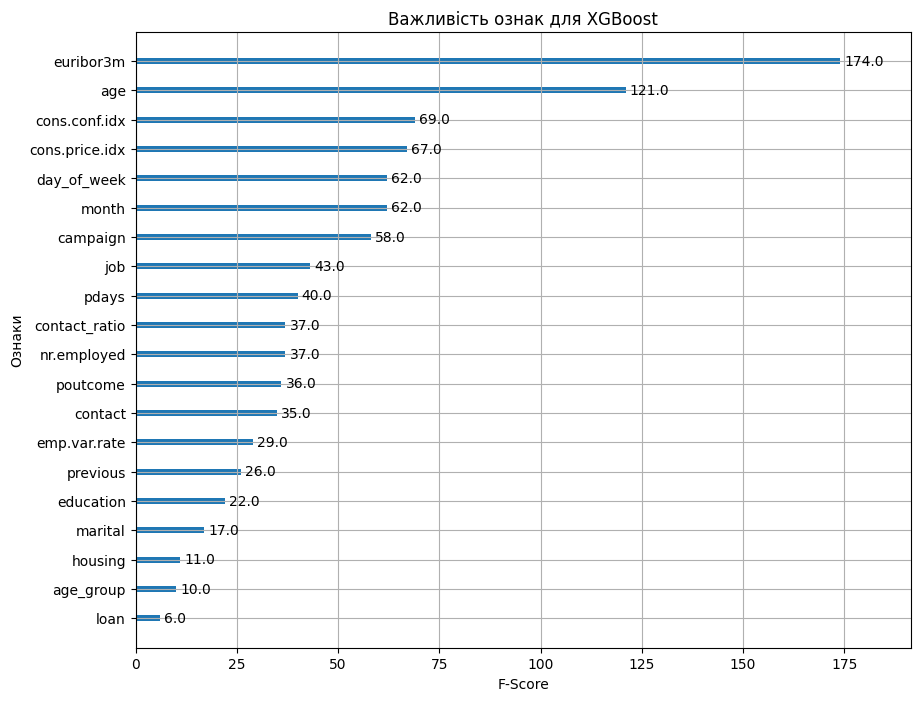

In [72]:
plt.figure(figsize=(10, 8))
xgb.plot_importance(best_model_hyperopt, ax=plt.gca())
plt.title('Важливість ознак для XGBoost')
plt.xlabel('F-Score')
plt.ylabel('Ознаки')
plt.show()

### Топ 5 важливих ознак для моделі XGBoost

1. `age` (вік)
2. `euribor3m` (щоквартальна ставка євро)
3. `campaign` (кількість контактів з клієнтом)
4. `day_of_week` (день тижня)
5. `month` (місяць)

Інші ознаки, такі як `job`, `cons.conf.idx`, `cons.price.idx` та інші, також є важливими, але їхній F-score є нижчим.

#### Оцінка адекватності з точки зору common sense

Трохи здивована побачити в топі такі показники як `day_of_week` та `day_of_week`, але можливо певні періоди (наприклад, початок чи кінець місяця, або певні пори року) можуть бути сприятливішими для прийняття фінансових рішень.

Інші ознаки в топ-5 доволі очікувані. Оскільки вік клієнта часто пов'язаний з його фінансовим становищем та поведінкою. Економічні показники, такі як відсоткові ставки, безпосередньо впливають на рішення клієнтів щодо інвестування або збереження коштів. А кількість контактів є критично важливою, оскільки вона вказує на інтенсивність зацікавленості клієнта.

Очікувала побачити в топі `job`. `education` та `marital`, але мабуть на успішне підписання строкового депозиту це не так впливає як вік, що є доволі цікавим спостереженням, як на мене.

# Аналіз впливу ознак за допомогою SHAP

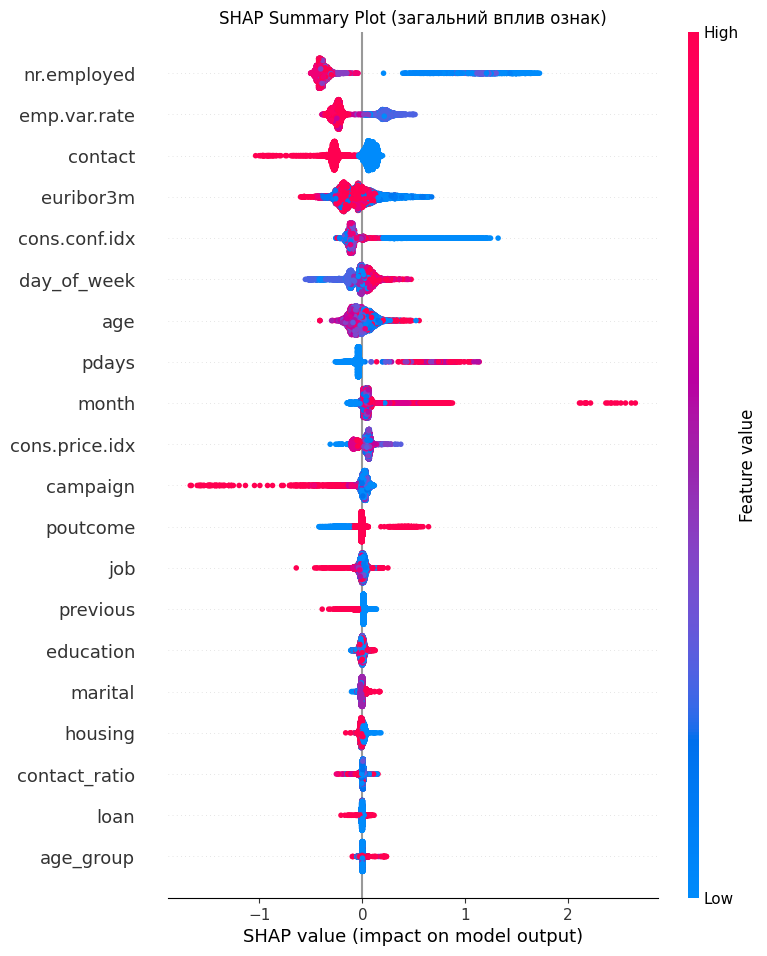

/usr/local/lib/python3.12/dist-packages/shap/plots/_force.py:211: UserWarning: shap.plots.force is slow for many thousands of rows, try subsampling your data.
  warnings.warn("shap.plots.force is slow for many thousands of rows, try subsampling your data.")


In [ ]:
explainer = shap.TreeExplainer(best_model_hyperopt)

shap_values = explainer.shap_values(X_test_xgb)

# SHAP Summary Plot
# Цей графік показує загальний вплив кожної ознаки на модель.
# Кожна точка - це окремий приклад. Позиція по осі X показує, як ознака вплинула на передбачення.
# Колір вказує на значення ознаки (високе/низьке).
shap.summary_plot(shap_values, X_test_xgb, show=False)
plt.title('SHAP Summary Plot (загальний вплив ознак)')
plt.show()

# SHAP Force Plot для одного прикладу
# Цей графік показує, як кожна ознака вплинула на конкретне передбачення.
# Червоні стрілки показують, що ознака збільшує ймовірність позитивного класу, сині - зменшують.
# base_value - це середнє передбачення для всього набору даних.
# output_value - це передбачення для конкретного прикладу.
shap.initjs()

force_plot = shap.force_plot(
    explainer.expected_value,
    shap_values,
    X_test_xgb
)
display(force_plot)

**Спостереження**

- `nr.employed` та `emp.var.rate`: Низькі значення (сині точки) цих ознак сприяють позитивному передбаченню (зсувають SHAP value праворуч). Це логічно: коли показники зайнятості та варіативної ставки низькі, клієнти більш схильні підписатися на терміновий депозит. Високі значення цих ознак (червоні точки) впливають негативно.

- `euribor3m`: Високі значення ставки (червоні точки) негативно впливають на передбачення, тоді як низькі (сині) — позитивно. Це має сенс, оскільки висока відсоткова ставка за може змусити клієнтів не підписуватися на депозит.

- `contact`:  На графіку помітно, що низькі значення contact (сині точки) знаходяться переважно праворуч, а високі (червоні) — зліва. Це свідчить про те, що певний тип контакту, скоріш за все, мобільний зв'язок, є більш ефективним, тоді як інший, можливо, стаціонарний телефон, менш ефективний.

- `day_of_week`:  Розподіл точок показує, що деякі дні (сині точки) мають негативний вплив на прогноз (зсув вліво), тоді як інші (червоні точки) — позитивний (зсув вправо). Це підтверджує, що для успішної взаємодії з клієнтами важливим є не тільки ткма розмови, але й час, коли вона відбувається. Це може бути пов’язано з тим, що певні дні є менш або більш зручними для прийняття рішень.

- `month`:  Цей показник має дуже сильний вплив. Видно, що певні місяці (червоні точки, що відповідають високим значенням, тобто пізнішим місяцям року) мають значний позитивний SHAP-вплив, зсуваючи прогноз праворуч. Це може вказувати на сезонну закономірність, коли клієнти більш схильні підписувати депозитні угоди наприкінці року або після отримання бонусів.

- `campaign`: Червоні точки (високе число контактів) в основному знаходяться ліворуч, що вказує на негативний вплив на передбачення. Це означає, що чим більше разів ви контактуєте з клієнтом, тим менша ймовірність, що він погодиться. Це доволі логічно: надмірна наполегливість відштовхує клієнтів.

- `poutcome`: Доволі очікуваний результат. Точки зсунуті вправо, особливо для успішних результатів. Це означає, що якщо клієнт погодився в минулому, він з більшою ймовірністю погодиться і в цьому.

- `education`: Значення цієї ознаки мають різний вплив на передбачення. Деякі рівні освіти (зокрема, з низьким значенням) негативно впливають на ймовірність успіху, тоді як інші (з високим значенням) можуть позитивно впливати, що цілком очікувано, оскільки освіта корелює з фінансовою грамотністю.



# Аналіз помилок моделі

In [73]:
cm = confusion_matrix(y_test_xgb, y_pred_xgb_test)

print(f"Кількість помилково-позитивних (FP): {cm[0][1]}")
print(f"Кількість помилково-негативних (FN): {cm[1][0]}")

fp_indices = np.where((y_test_xgb == 0) & (y_pred_xgb_test == 1))
fn_indices = np.where((y_test_xgb == 1) & (y_pred_xgb_test == 0))

false_positives = X_test_xgb.iloc[fp_indices]
false_negatives = X_test_xgb.iloc[fn_indices]

print("Аналіз помилково-негативних записів (перші 5):")
print(false_negatives.head())


print("Аналіз помилково-позитивних записів (перші 5):")
print(false_positives.head())

Кількість помилково-позитивних (FP): 110
Кількість помилково-негативних (FN): 720
Аналіз помилково-негативних записів (перші 5):
       age  job  marital  education  default  housing  loan  contact  month  day_of_week  campaign  pdays  previous  poutcome  emp.var.rate  cons.price.idx  cons.conf.idx  euribor3m  nr.employed  age_group  contact_ratio
31011   45    1        1          0        0        1     0        0      6            3         2     -1         0         1          -1.8          92.893          -46.2      1.344       5099.1          0            2.0
34364   32    6        2          3        0        0     0        0      6            2         3     -1         0         1          -1.8          92.893          -46.2      1.266       5099.1          0            3.0
35126   29    9        2          4        0        1     1        0      6            0         3     -1         0         1          -1.8          92.893          -46.2      1.250       5099.1          2   

**Спостереження**

Момент коли думаєш що модель вийшла гарна, а дійсність трохи не така райдужна.

Результати аналізу показують, що навчана модель має значну проблему з помилково-негативними передбаченнями:

***Помилково-позитивні (FP): 110***

***Помилково-негативні (FN): 720***

Це означає, що модель помилилася в 720 випадках, коли передбачала відмову, але клієнт насправді погодився на депозит.

В контексті бізнесу це означає, що модель ідентифікувала 720 клієнтів як потенційно незацікавлених, хоча вони були готові підписати договір. Кожен такий випадок – це втрачена можливість і потенційний втрачений дохід.

Модель схильна помилятися, коли прогнозує відмову, хоча клієнт насправді погодився. Це підтверджує, що модель недооцінює ймовірність успіху.

Це могло трапитися чере незбалансованість класів, коли кількість позитивних випадків значно менша, ніж негативних, що змушує модель бути "обережною" у своїх позитивних прогнозах.

Поглянувши на перші 5 записів FN, можна побачити, що ці клієнти мають різні вікові групи, сімейний стан, освіту тощо. Це свідчить, що помилки моделі не обмежені однією конкретною групою, а пов'язані з більш складними взаємодіями між ознаками.

Для того щоб покращити модель можна спробувати зробити наступне:

1. Використання методів, таких як SMOTE (оверсемплінг меншого класу), або зміна ваг класів у моделі XGBoost (scale_pos_weight). Це може допомогти моделі краще "бачити" позитивні випадки.

2. Детальніший аналіз помилок: Незважаючи на те, що перші 5 записів не виявили явних закономірностей, аналіз усіх 720 FN може виявити приховані патерни. Можна використовувати візуалізацію (наприклад, графіки розподілу) для порівняння розподілу ознак у FN-записах із загальним розподілом.

3. Подальший тюнінг гіперпараметрів: Можна зосередити тюнінг на метриках, що є більш чутливими до дисбалансу, таких як Recall або F1-Score, а не лише на ROC AUC.